In [1]:
# Importing necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

In [2]:
# Reading the dataset / CSV into Jupyter notebook.
df = pd.read_csv('credit_approval_anonymized.csv')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
# Finding the unique values, the data types, and the distribution of values in each column.
column_names = df.columns

for column in column_names:
    print(f'{column}: {df[column].dtype}')

for column in column_names:
    print(f'{column}: {df[column].unique()}')

for column in column_names:
    print(f'{column}: {df[column].describe()}')

A1: object
A2: float64
A3: float64
A4: object
A5: object
A6: object
A7: object
A8: float64
A9: object
A10: object
A11: int64
A12: object
A13: object
A14: float64
A15: int64
A16: object
A1: ['b' 'a' nan]
A2: [30.83 58.67 24.5  27.83 20.17 32.08 33.17 22.92 54.42 42.5  22.08 29.92
 38.25 48.08 45.83 36.67 28.25 23.25 21.83 19.17 25.   47.75 27.42 41.17
 15.83 47.   56.58 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.
 27.75 54.58 34.17 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92
 25.75 26.   37.42 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67
 23.42 20.42 26.67 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67
 34.08 21.67 21.5  49.58 27.67 39.83   nan 37.17 25.67 34.   49.   62.5
 31.42 52.33 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75
 29.17 24.58 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5
 47.67 22.75 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92
 31.25 56.5  43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 

#### These are the Unique Values for each column
- A1:  b, a.
- A2:  continuous.
- A3:  continuous.
- A4:  u, y, l, t.
- A5:  g, p, gg.
- A6:  c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7:  v, h, bb, j, n, z, dd, ff, o.
- A8:  continuous.
- A9:  t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,-         

### 1 - Data Loading and Cleaning:


##### Credit approval, what is it?
Credit approval is a process that checks and evaluates an applicant's ability to repay a loan based on their financial, demographic, and behavioural factors. The dataset we have, includes: age and gender, as well as the credit approval, and various other anonimized features. 

These help determine the risk of approving a loan/credit application. The goal of this project is to build a predictive classification model to determine whether an applicant should be approved or denied.

In [4]:
# These are the missing/null values for each column
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
# Checking the null values and the data types associated with the columns (organizing numerical + categorical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


### 2 - How missing values were treated
    
We categorized the object and numerical values, and then filled them in using the median and mode of the entire dataset. We did this because didn't want to lose any valuable data by dropping the rows (which would have been 37 rows). This is going to fuel the machine learning in a better way than just dropping the rows that have empty values in them.

##### Making a list out of numerical columns, calculating the median, and then putting them in a for loop to impute the median, then showing the info of the dataframe after. We thought this was better as the dataset could be trained better like this, and the dataset is not big enough, and its bad practice for the models to delete rows, which was another option.

In [6]:
numerical_columns = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
for col in numerical_columns:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


C:\Users\natur\AppData\Local\Temp\ipykernel_17576\2674711623.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


##### Making a list out of object (categorical) columns, computing the average mode (most common value), and then putting them in a for loop to impute the mode into the null values, then showing the info of the dataframe after.
##### We again, thought this best as we wanted to train the models better, and found it a bad practice to delete rows.

In [7]:
categorical_columns = ['A1', 'A4', 'A5', 'A6', 'A7']
for col in categorical_columns:
    if col in df.columns:
        mode_value = df[col].mode()[0]  
        df[col].fillna(mode_value, inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


C:\Users\natur\AppData\Local\Temp\ipykernel_17576\4249286509.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


### 3 - Exploratory Data Analysis (EDA)

Here we divided the distribution and numeral columns, checking for outliers and any other feature information we could find. We found that true and false have a huge impact on A16 (target feature) through this, next to the graphs showing many outliers.

#### Numerical feature distribution numerical_columns = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

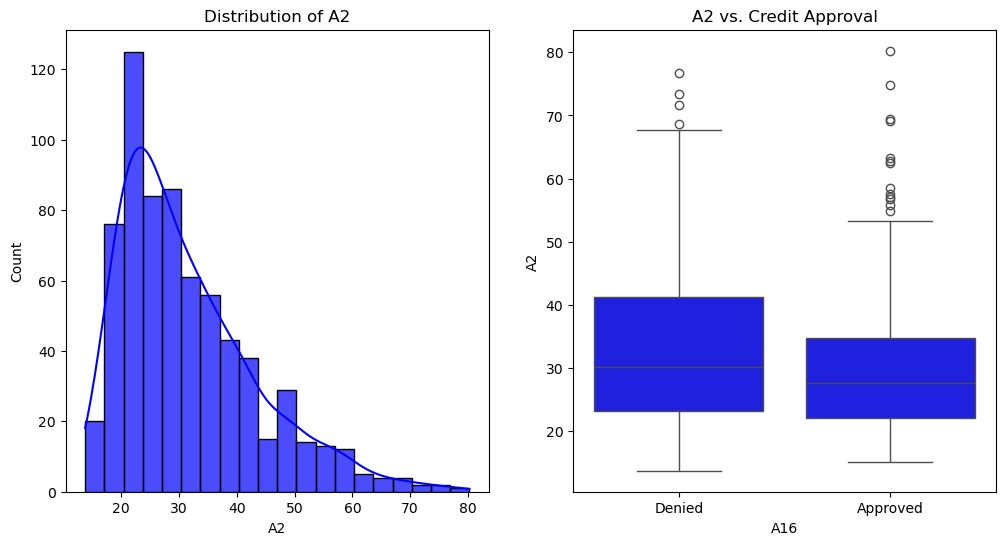

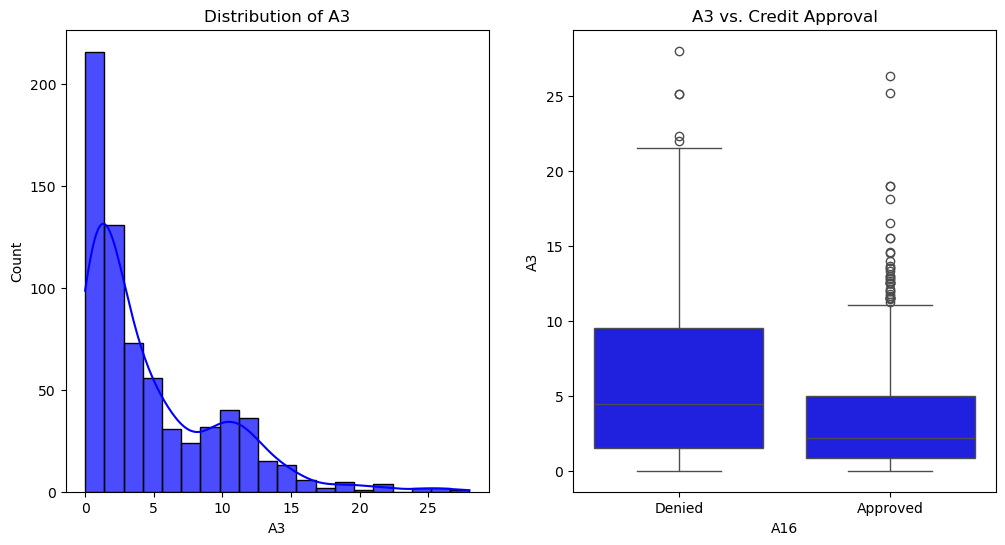

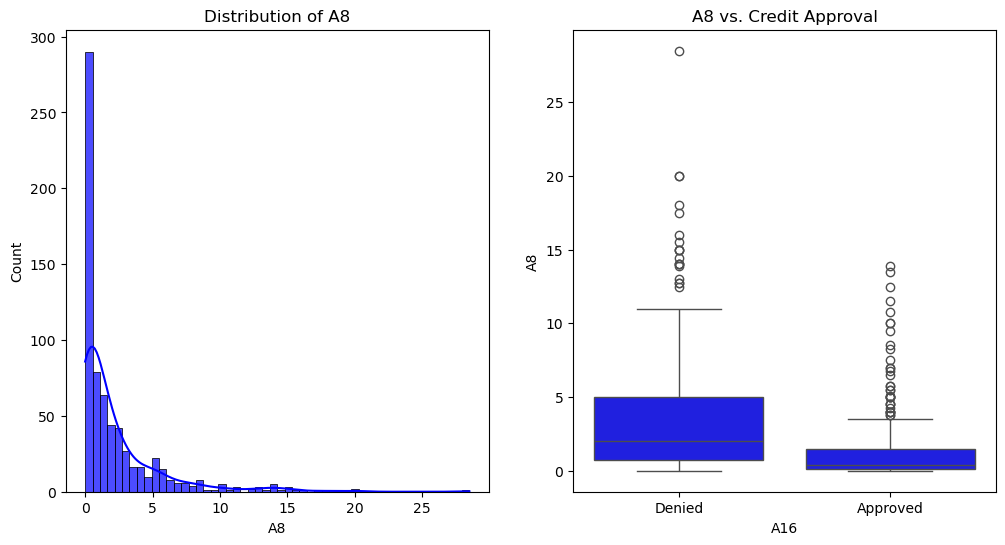

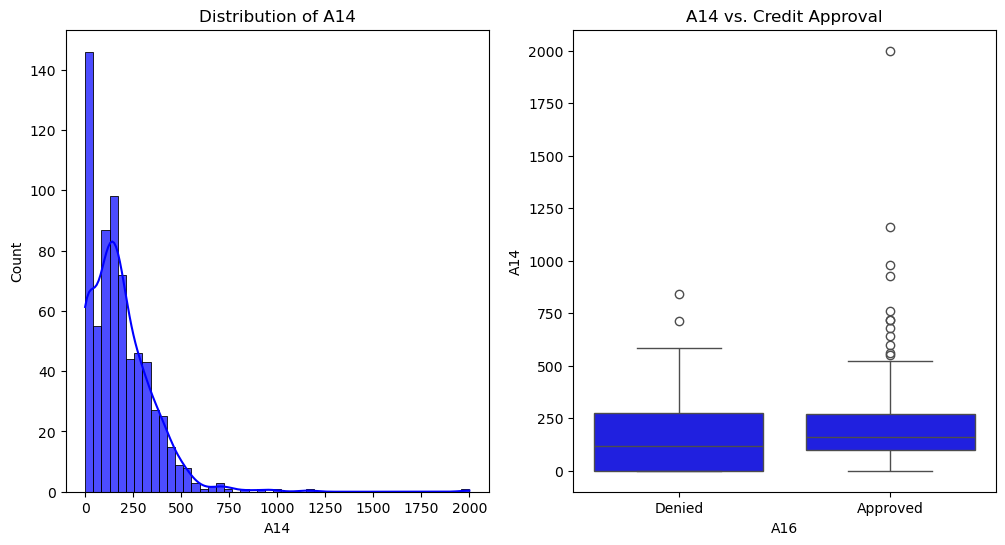

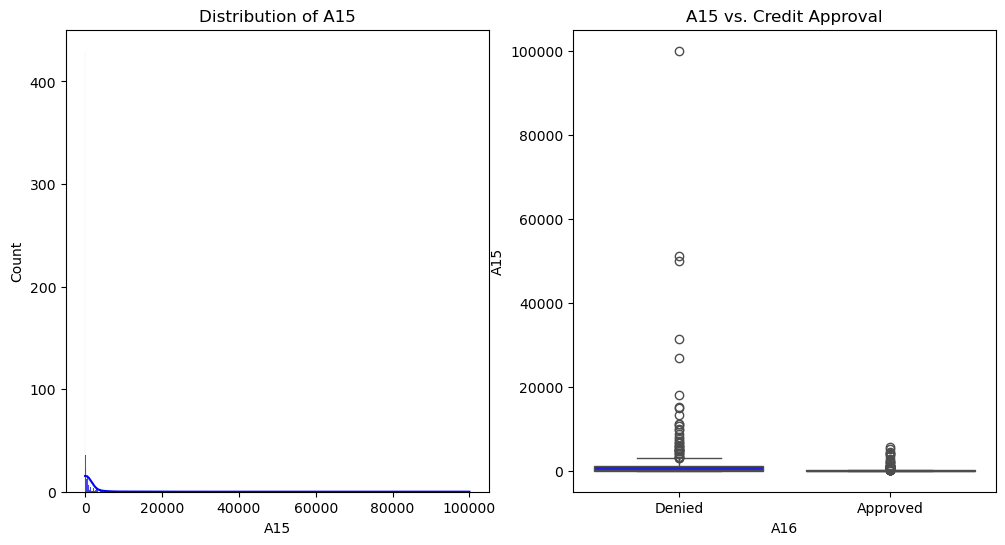

In [8]:
# Using histograms and box plots to show the distribution of numerical features 
for col in ['A2', 'A3', 'A8', 'A14', 'A15']: # Loop through selected numerical features and plot their distributions
    plt.figure(figsize=(12, 6)) 
    plt.subplot(1, 2, 1)  # Histogram to show the distribution of the numerical features, 1 row, 2 columns
    sns.histplot(df[col], kde=True , color='blue', alpha=0.7) # kde: computes a kernel density estimate to smooth the distribution and show on the plot as aline
    plt.title(f'Distribution of {col}') 

# Boxplot to compare feature distribution based on credit approval status
    plt.subplot(1, 2, 2) 
    sns.boxplot(x='A16', y=col, data=df, color='blue')
    plt.title(f'{col} vs. Credit Approval')
    plt.xticks([0, 1], ['Denied', 'Approved']) 
    
    plt.show()

The distribution of the age vs credit approval decision makes sense as there are more young people applying for credit than older people, and therefore they are more likely to get approved.
That shows its a weak correlation between age and credit approval decision.
The other feature that might be interesting is between A3 and A16, showing that between 0-5 range is a more likely decision to get approved. However there are a lot of outliers, which might be affecting the data. 

#### Categorical feature distribution categorical_columns = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

##### In this code, A16 gets compared to the other categorical columns (A1, A4, A5, A6, A7, A9, A10, A12, A13) with count plots, trying to find a pattern in the data.
##### Here the gender (A1) gets compared with the credit approval (A16), showing that women are slightly more likely to get approved, however the difference is not statistically significant especially considering that men apply for more credit approvals than women.

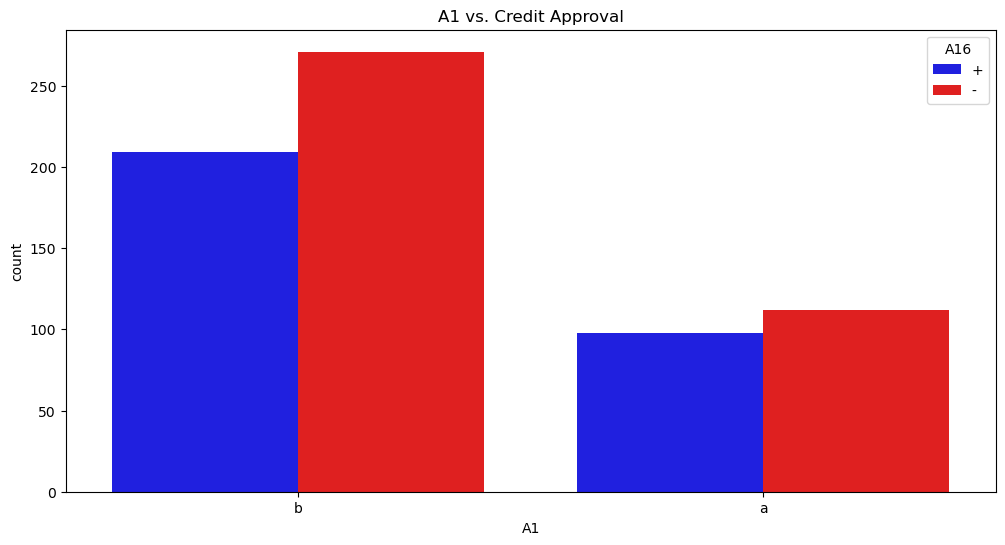

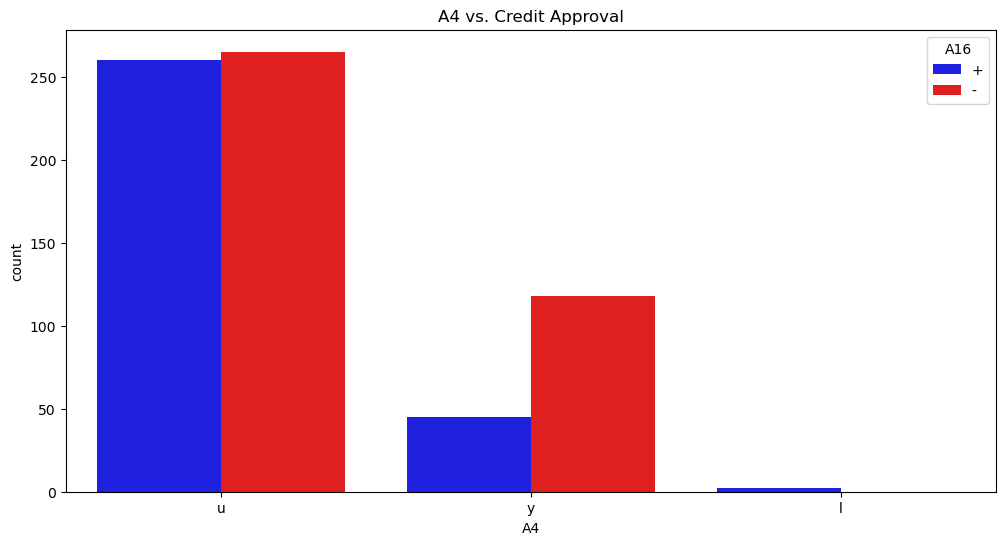

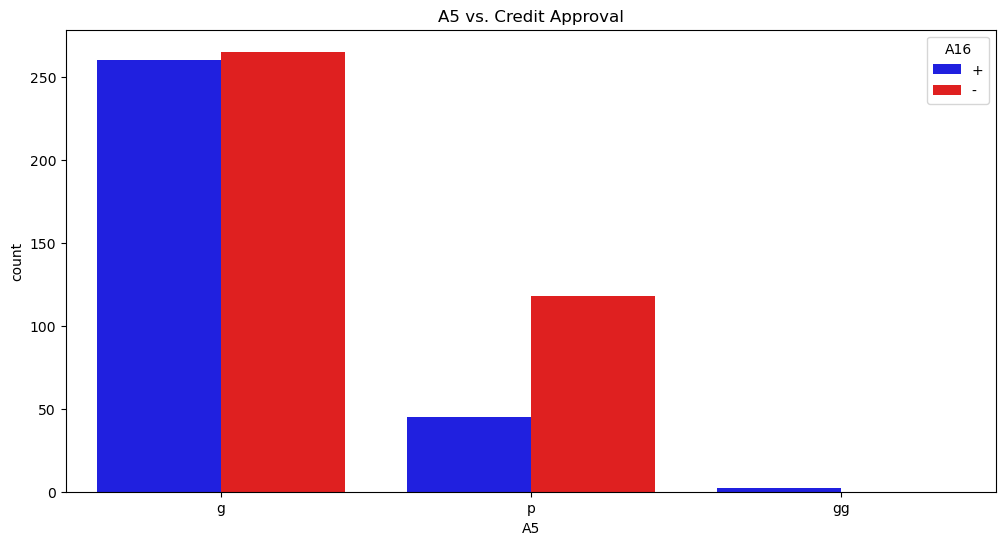

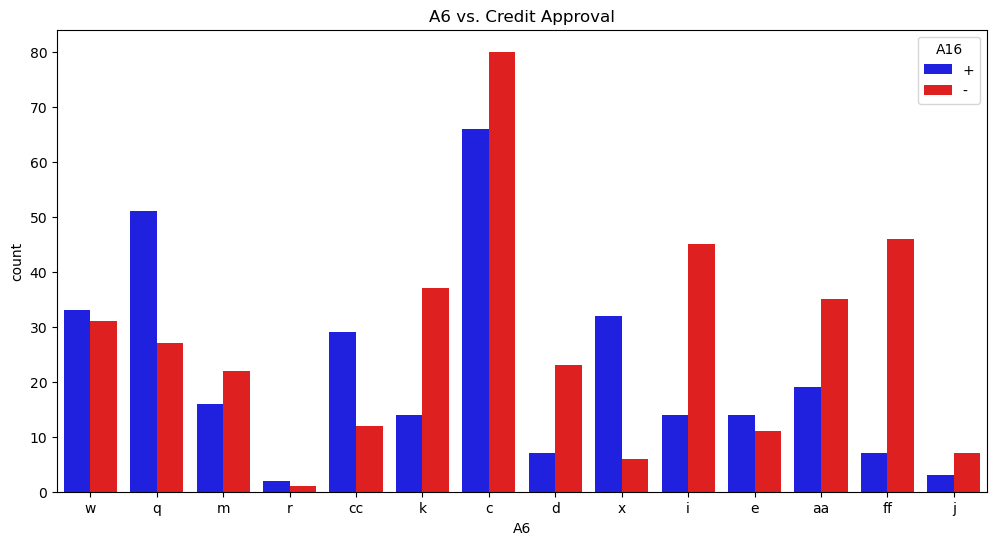

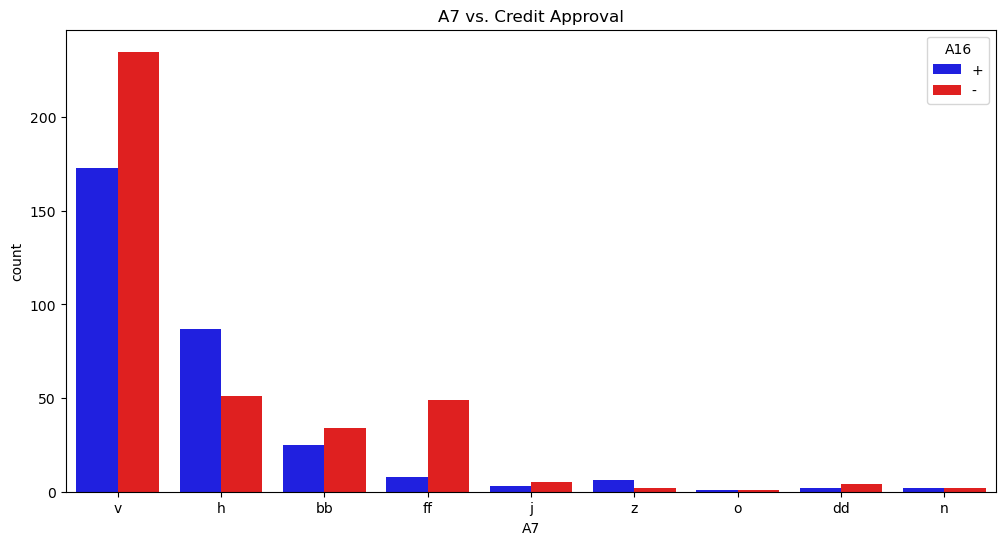

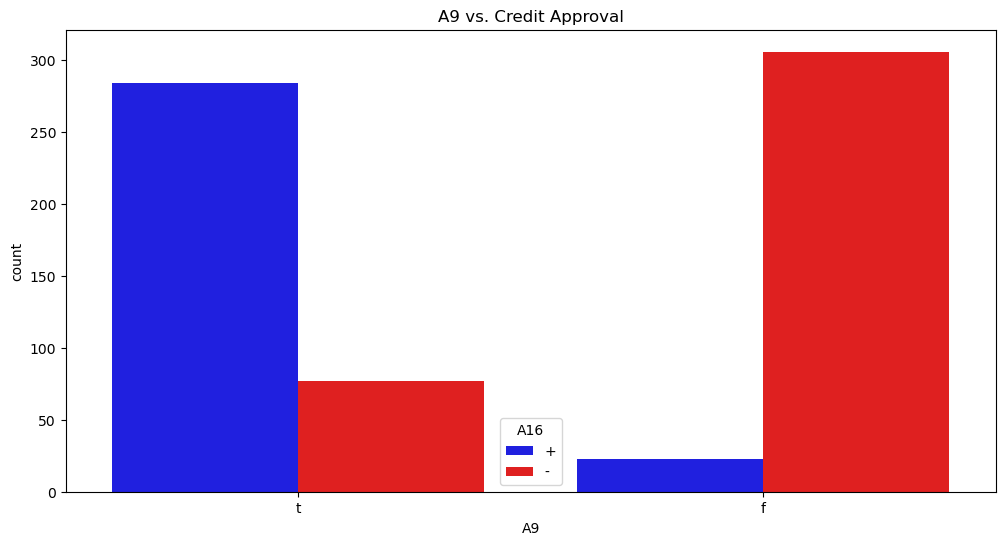

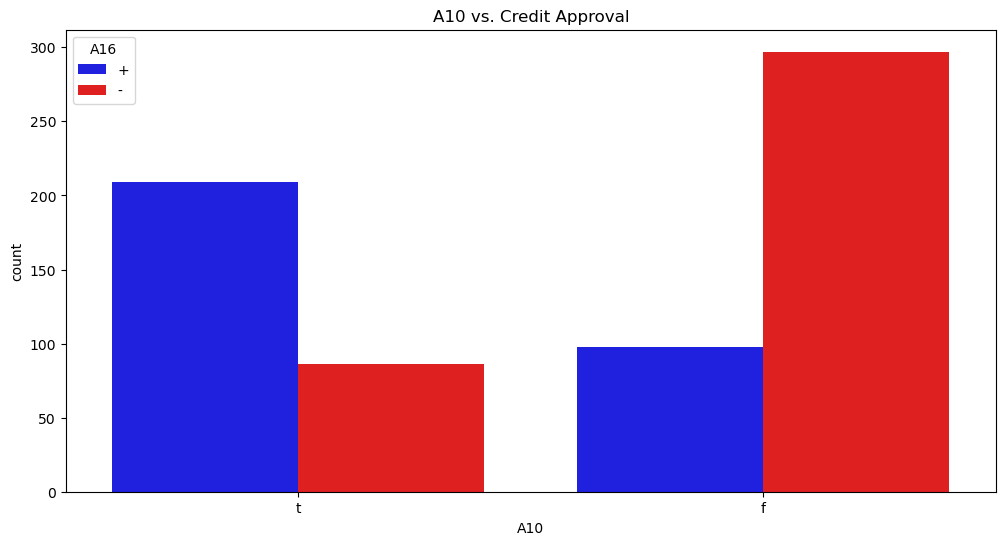

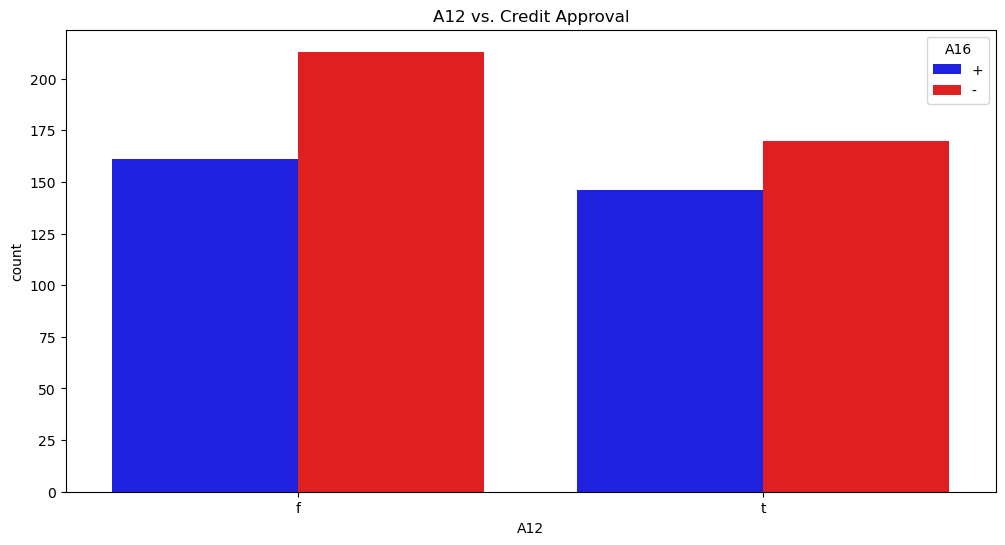

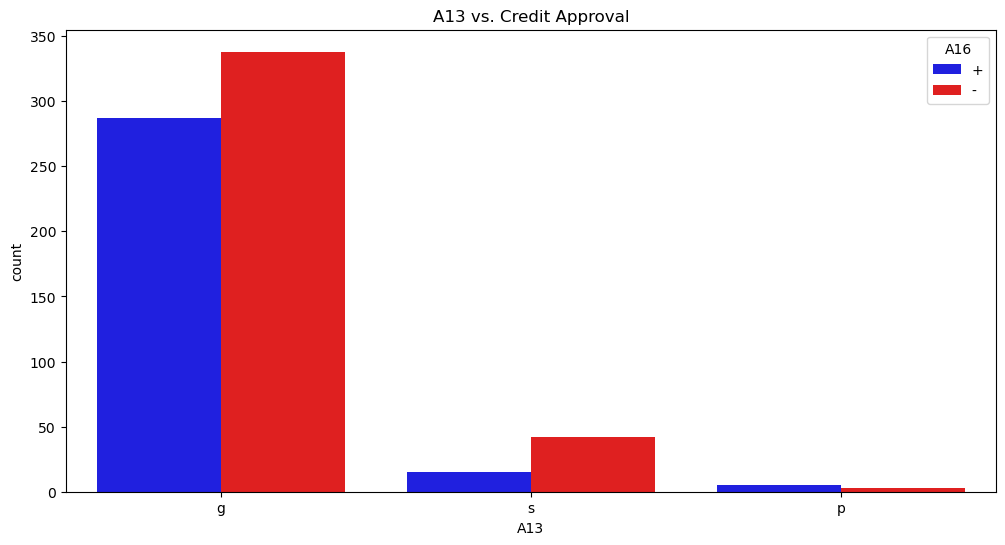

In [9]:
for col in ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='A16', data=df, palette=['blue', 'red'])
    plt.title(f'{col} vs. Credit Approval')
    plt.show()

The categorical variables have a high number of unique values, which can make it difficult to interpret the results. A4, A5, A12, and A13 do not show a clear pattern as we are unsure of what the values mean. 
The true false charts show a clear distinction between an approval and a rejection, which could be interesting to pursue at a later date, especially A9, A10, A12.
A1 does show a pattern, as women are more likely to get a credit approval than men. A6 shows that some of the values have higher chances of credit approval by a huge margin, however the values are still unclear. 

There are also many outliers in both categorical and numerical columns, which will be looked at later in the project.

### 4 - Feature Engineering 

##### Categorical data: A1 - A4 - A5 - A6 - A7 - A9 - A10 - A12 - A13 - A16
Here we are handling categorical variables using encoding methods label encoding for the categorical data, shaping them into values that we can then feed into the machine learning models.

In [10]:
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder, then looping the encoding to transform the column values.
label_encoder = LabelEncoder()
for col in ['A1', 'A4', 'A5', 'A6', 'A7',  'A9', 'A10', 'A12', 'A13', 'A16']:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


##### Numerical data: A2 - A3 - A8 - A11 - A14 - A15

Here we are handling numeric variables using a standardscaling method to transform the integer/floater data, shaping them into values within a certain range (-1 to 1) that we can then feed into the machine learning models.

In [62]:
from sklearn.preprocessing import StandardScaler # Importing StandardScaler, then looping the encoding to transform the column values.
scaler = StandardScaler()
df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = scaler.fit_transform(df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']])

df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,-0.057723,-0.956613,1,0,12,7,-0.291083,1,1,-0.288101,0,0,0.107155,-0.195413,0
1,0,2.291317,-0.060051,1,0,10,3,0.244190,1,1,0.740830,0,0,-0.816912,-0.087852,0
2,0,-0.591826,-0.856102,1,0,10,3,-0.216324,1,0,-0.493887,0,0,0.560471,-0.037144,0
3,1,-0.310853,-0.647038,1,0,12,7,0.456505,1,1,0.535044,1,0,-0.485643,-0.194837,0
4,1,-0.957176,0.174141,1,0,12,7,-0.153526,1,0,-0.493887,0,2,-0.369408,-0.195413,0


### 5 - Data Visualization 

##### Building a correlation matrix to show highly correlated features with A16. This is to understand which column directly impacts the Credit Decision (A16) variable the most.


In [12]:
correlation_matrix = df.corr() # Creating correlation matrix
correlation_matrix['A16'].sort_values(ascending=False) # Create correlation facing the correlation matrix on A16

A16    1.000000
A4     0.194306
A5     0.185134
A13    0.100867
A14    0.100042
A1     0.028934
A7    -0.000866
A12   -0.031625
A6    -0.130434
A2    -0.164086
A15   -0.175657
A3    -0.206294
A8    -0.322475
A11   -0.406410
A10   -0.458301
A9    -0.720407
Name: A16, dtype: float64

##### Creating a threshold and selecting correlated features based on the threshold of 0.1, this is to understand the impact of each feature on the Credit Decision feature.
##### 0.1 was based on class exercises, and to be sure that the correlation is positive and not negative or neutral.


In [13]:
threshold = 0.1 # Setting a threshold
selected_features = correlation_matrix[correlation_matrix['A16'].abs() > threshold].index.tolist() # Making a list that checks 
# if the values are above the threshold.
selected_features.remove('A16') # Removes A16 to place it on the selected feature table, so we can use it to plot against.
df_selected = df[selected_features + ['A16']]
df_selected.head()

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15,A16
0,-0.057723,-0.956613,1,0,12,-0.291083,1,1,-0.288101,0,0.107155,-0.195413,0
1,2.291317,-0.060051,1,0,10,0.244190,1,1,0.740830,0,-0.816912,-0.087852,0
2,-0.591826,-0.856102,1,0,10,-0.216324,1,0,-0.493887,0,0.560471,-0.037144,0
3,-0.310853,-0.647038,1,0,12,0.456505,1,1,0.535044,0,-0.485643,-0.194837,0
4,-0.957176,0.174141,1,0,12,-0.153526,1,0,-0.493887,2,-0.369408,-0.195413,0


<function matplotlib.pyplot.show(close=None, block=None)>

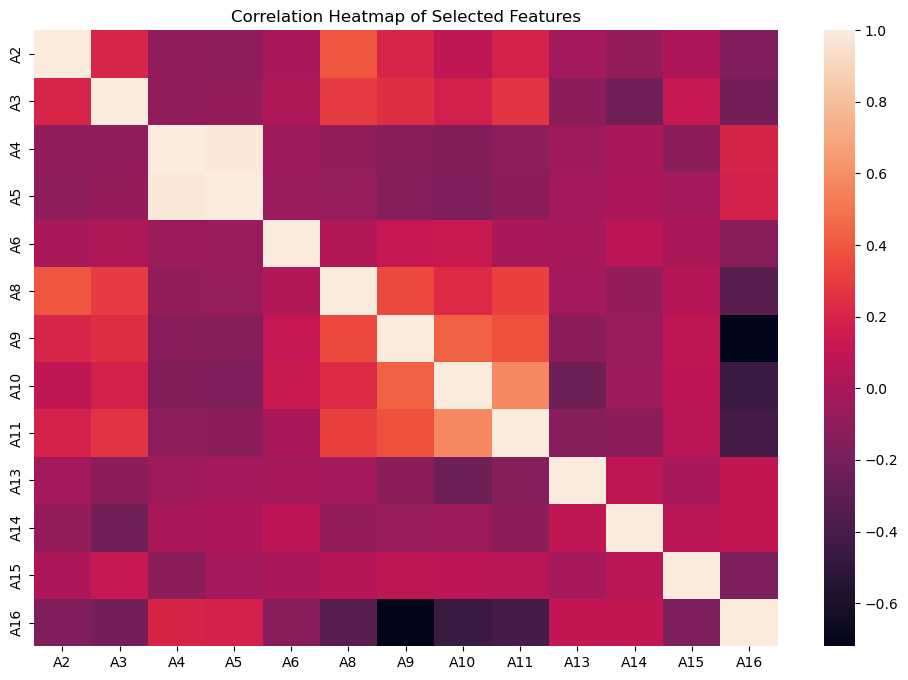

In [14]:
# Correlation heatmap of the selected features between the target variable A16 and all of the features.
plt.figure(figsize=(12,8))
sns.heatmap(df_selected.corr())
plt.title('Correlation Heatmap of Selected Features')
plt.show

##### There are a couple of clusters to keep watch on.
##### Cluster A16 - A4, A5 & A9 
##### Cluster A2 & A3: Range of A8 - A11
##### Cluster Range A9 to A11: Range of A8 to A10

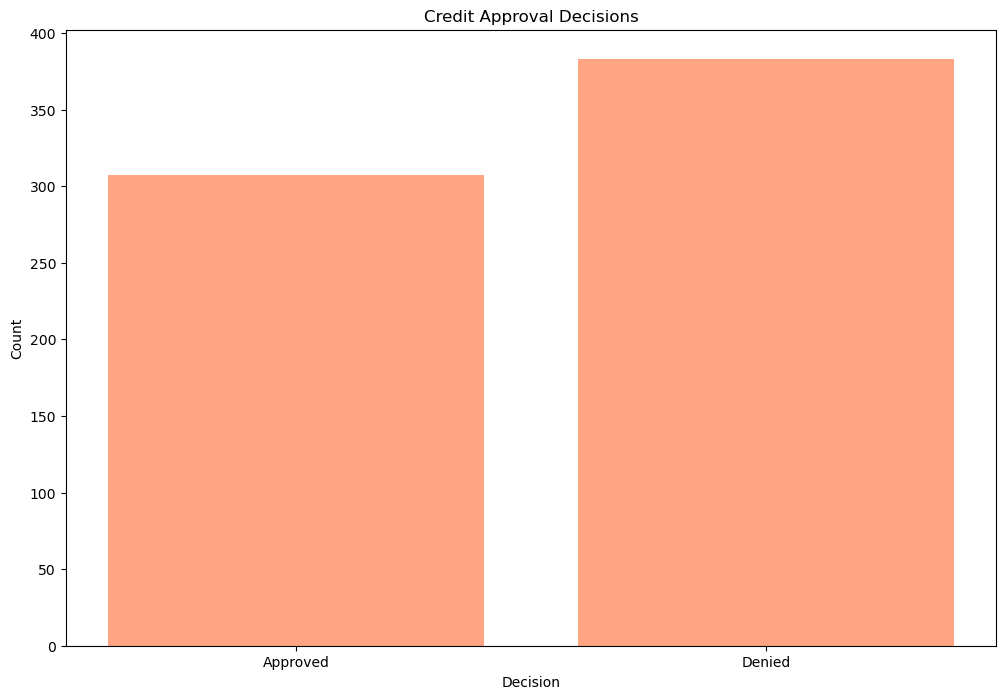

In [15]:
counts = df['A16'].value_counts()   

plt.figure(figsize=(12,8))
plt.bar(counts.index, counts.values, color='coral', alpha= 0.7,)    
plt.xticks([0, 1], ['Approved', 'Denied'])

plt.title('Credit Approval Decisions')
plt.xlabel('Decision')
plt.ylabel('Count')

plt.show()

##### Using a bar chart to show the distribution of credit approval decisions in the whole dataset.
##### This is interesting as it shows that all the data will be skewed slightly towards a denial of the credit approvals, as more of the requests are denied. 


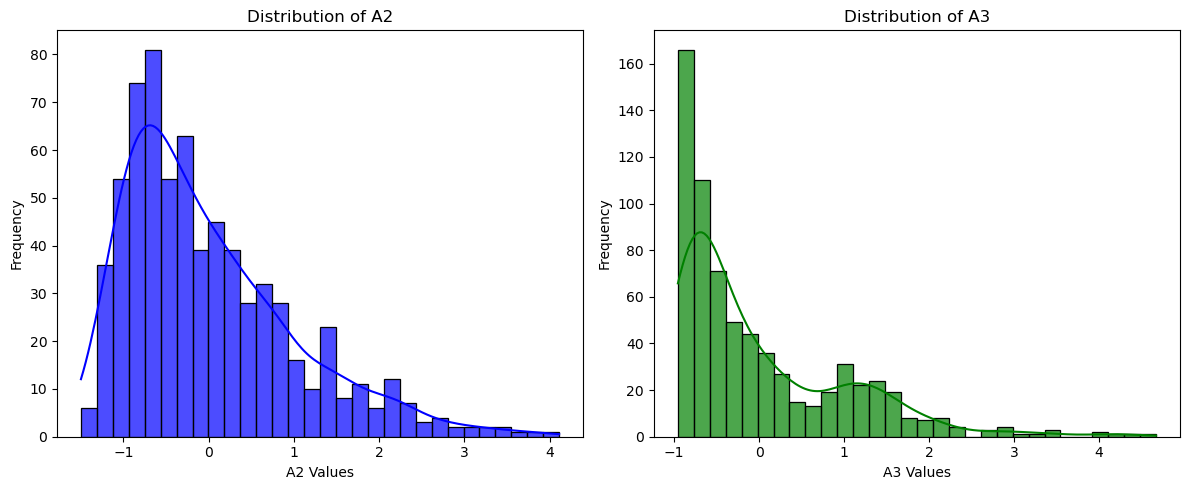

In [64]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_selected['A2'], bins=30, kde=True, color='blue', fill=True, alpha=0.7)
plt.title('Distribution of A2')
plt.xlabel('A2 Values')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_selected['A3'], bins=30, kde=True, color='green', fill=True, alpha=0.7)
plt.title('Distribution of A3')
plt.xlabel('A3 Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### This scatter plot shows the relationship between A2 and A3 as they are related to positive A16 values.
A4 and A5 have a better relationship to A16 but as they have binary values (0 to 1) the relationship is not valuable to explore further as half the values are either 0 or 1.
This shows that people that score good on these values are more likely to be approved, which is why A2 and A3 are selected for the comparison plot.
Both show that there is an emphasis on the values from -1 to 0 after standardization, the majority of the data being between those two values.


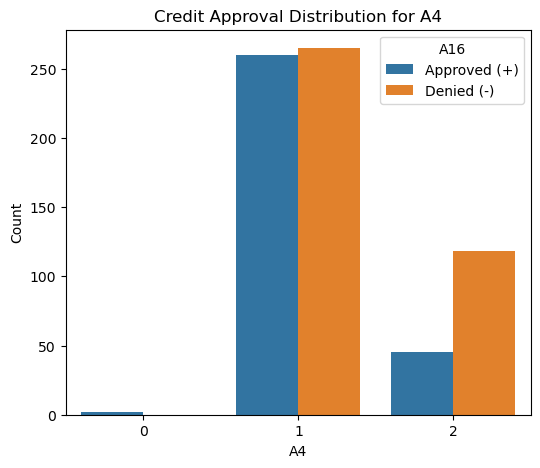

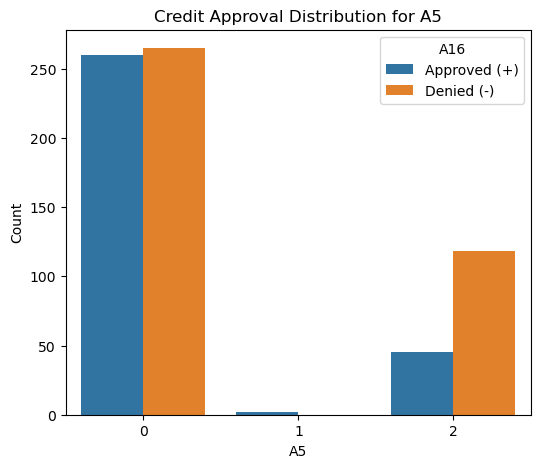

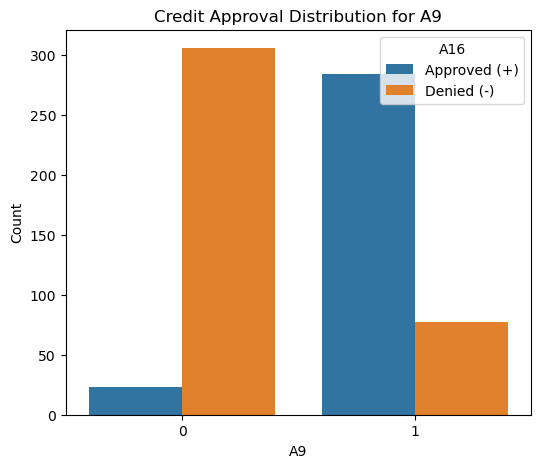

In [17]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_selected, x='A4', hue='A16')
plt.title(f'Credit Approval Distribution for {'A4'}')
plt.xlabel('A4')
plt.ylabel('Count')
plt.legend(title='A16', labels=['Approved (+)', 'Denied (-)'])
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(data=df_selected, x='A5', hue='A16')
plt.title(f'Credit Approval Distribution for {'A5'}')
plt.xlabel('A5')
plt.ylabel('Count')
plt.legend(title='A16', labels=['Approved (+)', 'Denied (-)'])
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(data=df_selected, x='A9', hue='A16')
plt.title(f'Credit Approval Distribution for {'A9'}')
plt.xlabel('A9')
plt.ylabel('Count')
plt.legend(title='A16', labels=['Approved (+)', 'Denied (-)'])
plt.show()

##### Here the credit approval of A4, A5, A9 are compared to A16 to see if there is a relationship between them. The true/false (1/0) values are used to show the distribution of the data, as shown above, these yes/no or three option columns are a huge indicator of credit decision approval.


### 6 - Model Building and Evaluation

#### 6.1 & 6.2 - Data Splitting & Model Training

In [18]:
# We import the necessary libraries then split the dataset into features (X) and target variable (y), and then split the data into training and testing sets.

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['A16'])
y = df[['A16']]

# Splits the data into training and testing sets, with 20% of the data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [19]:
# Then we import the KNN model and train it on the training data, and then make predictions on the test data.

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train) # Fits the KNN model to the training data (X_train and y_train)

y_pred = knn_model.predict(X_test) # Uses the trained model to make predictions on the test data (X_test), storing the predictions in y_pred.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Accuracy is a measure of overall correctness. It calculates the ratio of correctly predicted instances to the total instances. High accuracy suggests that the model is making correct predictions across both positive and negative classes.

##### Precision measures the accuracy of positive predictions. It calculates the ratio of true positive  Out of all predicted positive instances, how many are actually positive. predictions to the total positive predictions made by the model. High precision indicates that when the model predicts a positive class, it is often correct.

##### Recall, measures the ability of the model to capture all positive instances. It calculates the ratio of true positive predictions to the total actual positive instances. Out of all actual positive instances, how many were correctly predicted. High recall indicates that the model effectively identifies a significant portion of the positive instances.

##### The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially in imbalanced datasets. F1 Score combines the strengths of precision and recall. It is suitable when there's a need to  balance false positives and false negatives.

In [20]:
# Here we import the accuracy, precision, and recall metrics to evaluate the performance of the test and predict data.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_accuracy = accuracy_score(y_test, y_pred) # Calculates the accuracy score by comparing the true labels (y_test) and predicted labels (y_pred) for the KNN model
knn_precision = precision_score(y_test, y_pred) # Calculates the precision score, which measures the proportion of true positive predictions out of all predicted positive cases.
knn_recall = recall_score(y_test, y_pred) # Calculates the recall score, which measures the proportion of actual positive cases correctly identified by the KNN model.
knn_f1 = f1_score(y_test, y_pred) # Calculates the F1 score, which is the harmonic mean of precision and recall, providing a balanced performance measure.

print(f'Accuracy: {knn_accuracy}')
print(f'Precision: {knn_precision}')
print(f'Recall: {knn_recall}')
print(f'F1 Score: {knn_f1}')


Accuracy: 0.7608695652173914
Precision: 0.7160493827160493
Recall: 0.8529411764705882
F1 Score: 0.7785234899328859


##### Cross-validation is a technique used to assess the performance and generalization ability of a machine learning model by dividing the dataset into multiple subsets. Involves splitting the dataset into multiple folds to assess performance across different subsets of the data.

##### Split Data:
- Divide the dataset into k subsets (folds) of equal size.
Training and Validation:
- Train the model on k − 1 folds.
- Validate the model on the remaining fold.

##### Repeat:
- Perform this process k times, using a different fold as the validation set each time.
Aggregate Results:
- Calculate the average performance across all k iterations to evaluate the model comprehensive performance across all k iterations to evaluate the model.


In [21]:
# Here we split the data into 5 and cross validate the model. The cross validation metrics are used to evaluate the performance of the KNN model
from sklearn.model_selection import cross_val_score

knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores:\n{knn_cv_scores}') # Prints the mean accuracy of the cross-validation scores, rounded to four decimal places.
print('Mean Accuracy: {:.4f} '.format(knn_cv_scores.mean())) # Prints the individual cross-validation scores for each fold.

Cross-Validation Scores:
[0.66666667 0.83333333 0.8115942  0.70289855 0.78985507]
Mean Accuracy: 0.7609 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

##### For KNN, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

##### Then we import the Logistic Regression model We used the logistic regression model to see how each feature affects the target variable (credit approval). This code trains the model and makes predictions on the test set. The accuracy, precision, and recall, as well as cross validation metrics are used to evaluate the performance of the model.


In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred) 

print(f'Accuracy: {lr_accuracy}') 
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print(f'F1 Score: {lr_f1}')

lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy') 
print(f'Cross-Validation Scores:\n{lr_cv_scores}')
print('Mean Accuracy: {:.4f} '.format(lr_cv_scores.mean()))

Accuracy: 0.8478260869565217
Precision: 0.8405797101449275
Recall: 0.8529411764705882
F1 Score: 0.8467153284671532
Cross-Validation Scores:
[0.63043478 0.96376812 0.92753623 0.77536232 0.89855072]
Mean Accuracy: 0.8391 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [24]:
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores:\n{lr_cv_scores}')
print('Mean Accuracy: {:.4f} '.format(lr_cv_scores.mean()))

Cross-Validation Scores:
[0.63043478 0.96376812 0.92753623 0.77536232 0.89855072]
Mean Accuracy: 0.8391 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

##### For logistic regression, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.77


In [26]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred) 
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {dt_accuracy}')
print(f'Precision: {dt_precision}')
print(f'Recall: {dt_recall}')
print(f'F1 Score: {dt_f1}')

Accuracy: 0.7681159420289855
Precision: 0.7432432432432432
Recall: 0.8088235294117647
F1 Score: 0.7746478873239436


In [27]:
dt_cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores:\n{dt_cv_scores}')
print('Mean Accuracy: {:.4f} '.format(dt_cv_scores.mean()))

Cross-Validation Scores:
[0.65942029 0.87681159 0.83333333 0.76811594 0.88405797]
Mean Accuracy: 0.8043 


##### For DT, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

#### 6.3 - Model Evaluation 

Use cross-validation to evaluate your models and report the average
performance metrics (e.g., accuracy, precision, recall, F1-score).
Compare cross-validation results with those from the test set to analyze any differences.
Discuss overfitting and under-fitting based on the results.

In [28]:
models = ['Logistic Regression', 'KNN', 'Decision Tree'] # Creating a new dataframe with all the models together.

accuracy = [lr_accuracy, knn_accuracy, dt_accuracy]
precision = [lr_precision, knn_precision, dt_precision]
recall = [lr_recall, knn_recall, dt_recall]
F1_Score = [lr_f1, knn_f1, dt_f1]

cross_val_scores = [lr_cv_scores.mean(), knn_cv_scores.mean(), dt_cv_scores.mean()]

model_scores_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score' : F1_Score,
    'Cross-Validation Mean Score': cross_val_scores
})

model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score
0,Logistic Regression,0.847826,0.840580,0.852941,0.846715,0.839130
1,KNN,0.760870,0.716049,0.852941,0.778523,0.760870
2,Decision Tree,0.768116,0.743243,0.808824,0.774648,0.804348


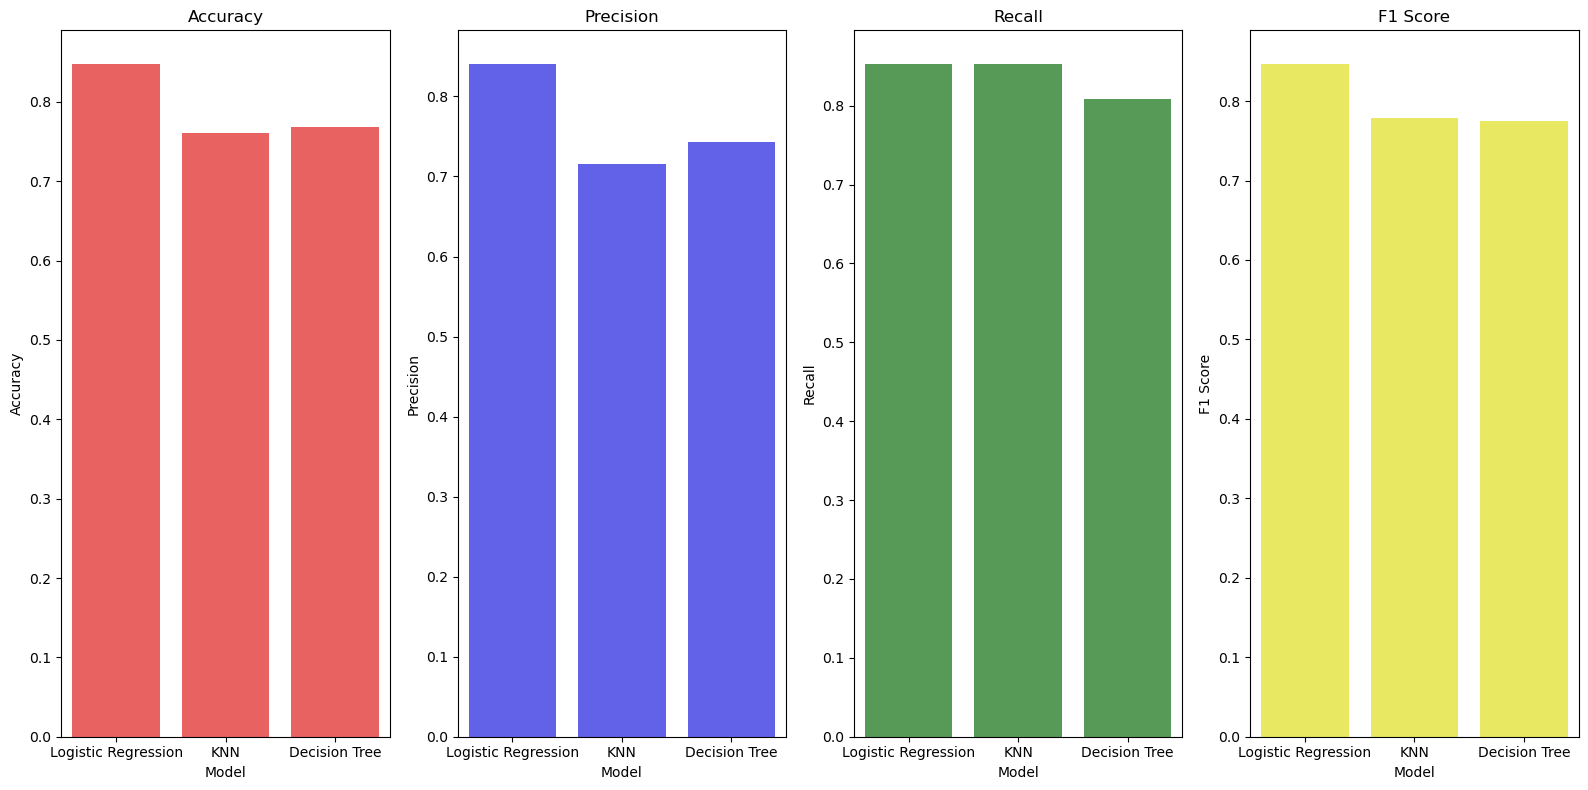

In [29]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)  # Histogram to show the distribution of the numerical features, 1 row, 4 columns
sns.barplot(x=model_scores_df['Model'], y=model_scores_df['Accuracy'], color='red', alpha=0.7)
plt.title(f'Accuracy') 


plt.subplot(1, 4, 2)  
sns.barplot(x=model_scores_df['Model'], y=model_scores_df['Precision'], color='blue', alpha=0.7)
plt.title(f'Precision') 
    
plt.subplot(1, 4, 3)  
sns.barplot(x=model_scores_df['Model'], y=model_scores_df['Recall'], color='green', alpha=0.7)
plt.title(f'Recall') 

plt.subplot(1, 4, 4)  
sns.barplot(x=model_scores_df['Model'], y=model_scores_df['F1 Score'], color='yellow', alpha=0.7)
plt.title(f'F1 Score') 


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Cross-Validation Mean Score')

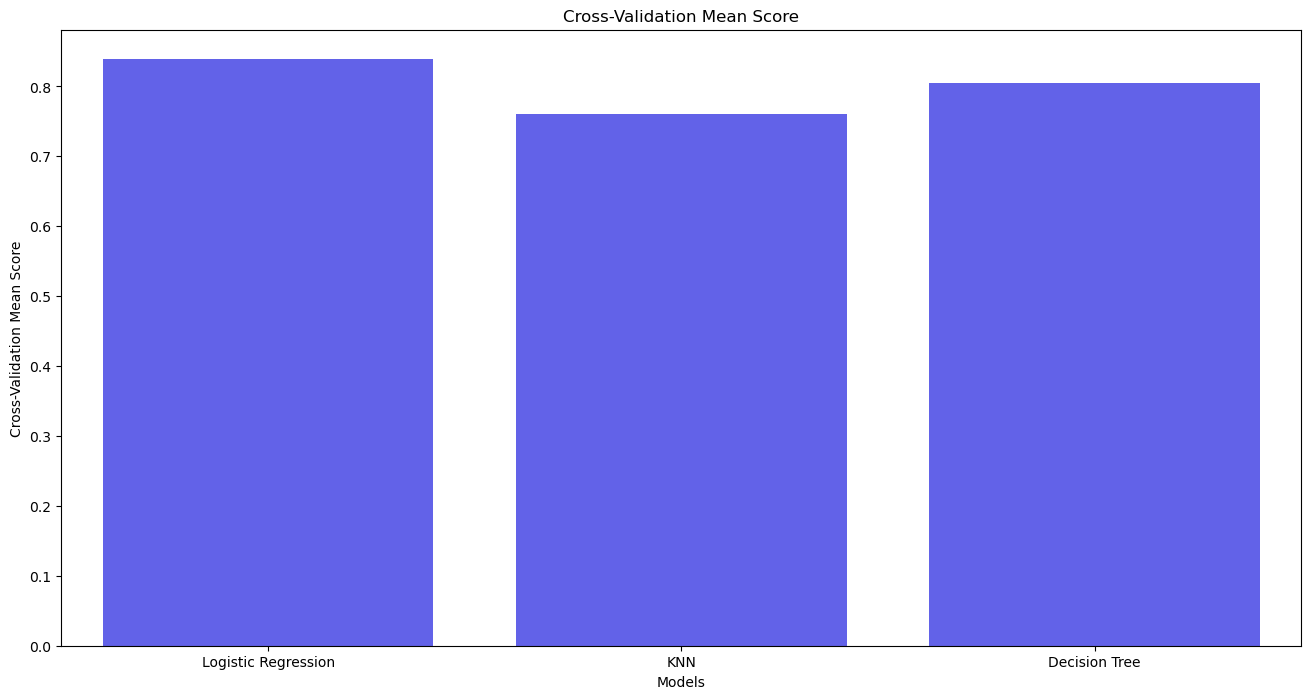

In [30]:
plt.figure(figsize=(16, 8)) 
sns.barplot(x=model_scores_df['Model'], y=model_scores_df['Cross-Validation Mean Score'], color='blue', alpha=0.7)
plt.xlabel('Models')
plt.title(f'Cross-Validation Mean Score')

### HYPER PARAMETER TUNING

In [31]:
from sklearn.model_selection import GridSearchCV
# knn_model

scaler = StandardScaler()   # Rescaling helps the model actually perform better
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10]
}

knn_grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Cross-Validation Score:", knn_grid_search.best_score_)

# Evaluate best model on test data
best_knn = knn_grid_search.best_estimator_
knn_y_pred_tuned = best_knn.predict(X_test_scaled)

knn_accuracy_tuned = accuracy_score(y_test, knn_y_pred_tuned)
knn_precision_tuned = precision_score(y_test, knn_y_pred_tuned)
knn_recall_tuned = recall_score(y_test, knn_y_pred_tuned)
knn_f1_tuned = f1_score(y_test, knn_y_pred_tuned)

print(f'Tuned Model Accuracy: {knn_accuracy_tuned}')
print(f'Tuned Model Precision: {knn_precision_tuned}')
print(f'Tuned Model Recall: {knn_recall_tuned}')
print(f'Tuned Model F1 Score: {knn_f1_tuned}')


Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Score: 0.8514496314496315
Tuned Model Accuracy: 0.8260869565217391
Tuned Model Precision: 0.782051282051282
Tuned Model Recall: 0.8970588235294118
Tuned Model F1 Score: 0.8356164383561644


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
# lr_model

# Define hyperparameter grid
param_grid = {
    'C': [0.5, 1, 2, 3, 5, 7, 10],
}


# Initialize GridSearchCV
lr_grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Cross-Validation Score:", lr_grid_search.best_score_)

# Evaluate best model on test data
best_lr = lr_grid_search.best_estimator_
lr_y_pred_tuned = best_lr.predict(X_test_scaled)

lr_accuracy_tuned = accuracy_score(y_test, lr_y_pred_tuned)
lr_precision_tuned = precision_score(y_test, lr_y_pred_tuned)
lr_recall_tuned = recall_score(y_test, lr_y_pred_tuned)
lr_f1_tuned = f1_score(y_test, lr_y_pred_tuned)

print(f'Tuned Model Accuracy: {lr_accuracy_tuned}')
print(f'Tuned Model Precision: {lr_precision_tuned}')
print(f'Tuned Model Recall: {lr_recall_tuned}')
print(f'Tuned Model F1 Score: {lr_f1_tuned}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Best Parameters: {'C': 3}
Best Cross-Validation Score: 0.8659623259623259
Tuned Model Accuracy: 0.8405797101449275
Tuned Model Precision: 0.8382352941176471
Tuned Model Recall: 0.8382352941176471
Tuned Model F1 Score: 0.8382352941176471


In [33]:
from sklearn.model_selection import cross_val_score

# Testing default model
default_lr = LogisticRegression()
default_lr.fit(X_train, y_train)
y_pred_default = default_lr.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f'Default Model Accuracy: {default_accuracy}')
print(f'Tuned Model Accuracy: {lr_accuracy_tuned}')

Default Model Accuracy: 0.8478260869565217
Tuned Model Accuracy: 0.8405797101449275


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Decision Tree model
# https://scikit-learn.org/stable/modules/tree.html

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required per leaf node
}

dt_grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", dt_grid_search.best_params_)
print("Best Cross-Validation Score:", dt_grid_search.best_score_)

# Evaluating best model on test data
best_dt = dt_grid_search.best_estimator_
dt_y_pred_tuned = best_dt.predict(X_test_scaled)

dt_accuracy_tuned = accuracy_score(y_test, dt_y_pred_tuned)
dt_precision_tuned = precision_score(y_test, dt_y_pred_tuned)
dt_recall_tuned = recall_score(y_test, dt_y_pred_tuned)
dt_f1_tuned = f1_score(y_test, dt_y_pred_tuned)

print(f'Tuned Model Accuracy: {dt_accuracy_tuned}')
print(f'Tuned Model Precision: {dt_precision_tuned}')
print(f'Tuned Model Recall: {dt_recall_tuned}')
print(f'Tuned Model F1 Score: {dt_f1_tuned}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8406060606060606
Tuned Model Accuracy: 0.8115942028985508
Tuned Model Precision: 0.7625
Tuned Model Recall: 0.8970588235294118
Tuned Model F1 Score: 0.8243243243243243


In [35]:
# Comparing the performance of the tuned models through accuracy, precision, recall, and F1 score cross-validation scores.
models = ['Logistic Regression', 'KNN', 'Decision Tree']


accuracy = [lr_accuracy_tuned, knn_accuracy_tuned, dt_accuracy_tuned]
precision = [lr_precision_tuned, knn_precision_tuned, dt_precision_tuned]
recall = [lr_recall_tuned, knn_recall_tuned, dt_recall_tuned]
F1_Score = [lr_f1_tuned, knn_f1_tuned, dt_f1_tuned]
cross_val_scores = [lr_grid_search.best_score_, knn_grid_search.best_score_, dt_grid_search.best_score_]

tuned_model_scores_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score' : F1_Score,
    'Cross-Validation Mean Score': cross_val_scores
})

tuned_model_scores_df



,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score
0,Logistic Regression,0.840580,0.838235,0.838235,0.838235,0.865962
1,KNN,0.826087,0.782051,0.897059,0.835616,0.851450
2,Decision Tree,0.811594,0.762500,0.897059,0.824324,0.840606


##### Here the cross-validation scores seem to not differ as much between the folds, meaning its generalized pretty well compared to the default models. 

In [36]:
tuned_model_scores_df['Data Type'] = 'Tuned'
model_scores_df['Data Type'] = 'Default'

# Combine both datasets, both tuned and default.
tuned_combined_model_scores_df = pd.concat([tuned_model_scores_df, model_scores_df])
tuned_combined_model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score,Data Type
0,Logistic Regression,0.840580,0.838235,0.838235,0.838235,0.865962,Tuned
1,KNN,0.826087,0.782051,0.897059,0.835616,0.851450,Tuned
2,Decision Tree,0.811594,0.762500,0.897059,0.824324,0.840606,Tuned
0,Logistic Regression,0.847826,0.840580,0.852941,0.846715,0.839130,Default
1,KNN,0.760870,0.716049,0.852941,0.778523,0.760870,Default
2,Decision Tree,0.768116,0.743243,0.808824,0.774648,0.804348,Default


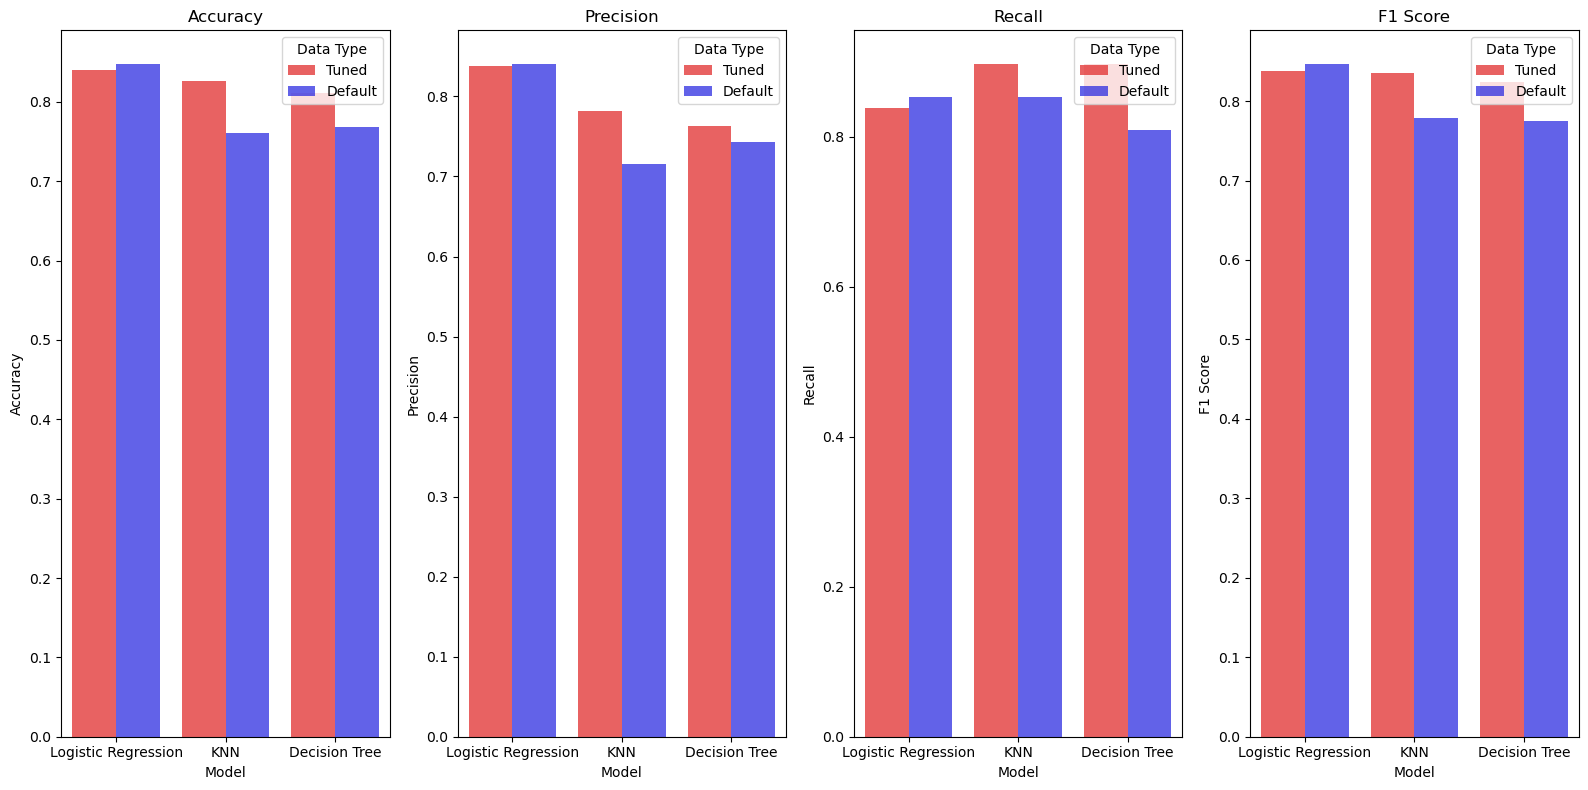

In [37]:
plt.figure(figsize=(16, 8))  

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i) 
    sns.barplot(x='Model', y=metric, hue='Data Type', data=tuned_combined_model_scores_df, palette=['red', 'blue'], alpha=0.7)
    plt.title(metric)

plt.tight_layout()
plt.show()

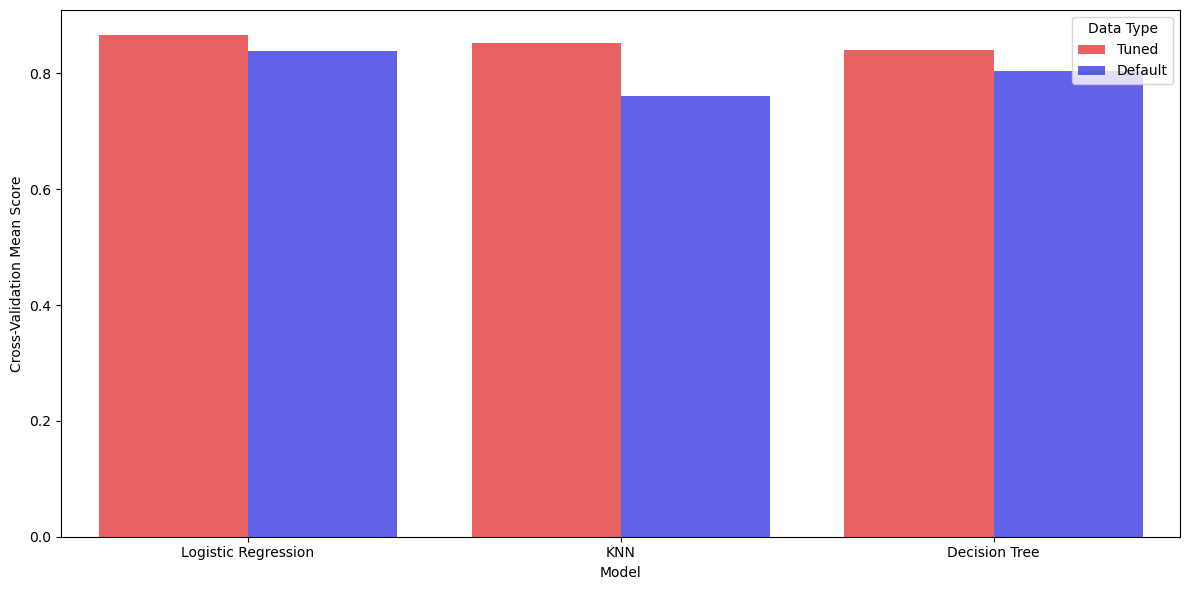

In [38]:
# Comparing the Raw (Default) data vs. Tuned data cross-validation scores. 
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Model', y='Cross-Validation Mean Score', hue='Data Type', data=tuned_combined_model_scores_df, palette=['red', 'blue'], alpha=0.7)
plt.tight_layout()
plt.show()


In most of the seperate scores, the default data is more accurate than the tuned data, with seemingly no exceptions between the models.

This changes when measuring the cross-validation with the models, and giving it different folds, the mean of them is better tuned than default in that case. This means that using hyperparameter tuning is definitely recommended with this dataset, as it increased scores. There are also signs that the Default data for the decision tree gets over-fitted into the model, which could possibly come from not using MinMax scaler instead of StandardScaler, making the Decision Tree the least useful model.

In [39]:
# Outliers

# Compute IQR (Interquartile Ranges)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Defining outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing these outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [40]:
X = df_cleaned.drop(columns = ['A16'])
y = df_cleaned[['A16']]
# Splits the data into training and testing sets, with 20% of the data used for testing,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [41]:
clean_knn_model = KNeighborsClassifier() # starts a K-Nearest Neighbors classifier model.
clean_knn_model.fit(X_train, y_train) # Fits the KNN model to the training data (X_train and y_train)


y_pred = clean_knn_model.predict(X_test) # Uses the trained model to make predictions on the test data (X_test), storing the predictions in y_pred.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
clean_knn_accuracy = accuracy_score(y_test, y_pred) # Calculates the accuracy score by comparing the true labels (y_test) and predicted labels (y_pred) for the KNN model.
clean_knn_precision = precision_score(y_test, y_pred) # Calculates the precision score, which measures the proportion of true positive predictions out of all predicted positive cases.
clean_knn_recall = recall_score(y_test, y_pred) # Calculates the recall score, which measures the proportion of actual positive cases correctly identified by the KNN model.
clean_knn_f1 = f1_score(y_test, y_pred) # Calculates the F1 score, which is the harmonic mean of precision and recall, providing a balanced performance measure.


print(f'Accuracy: {clean_knn_accuracy}')
print(f'Precision: {clean_knn_precision}')
print(f'Recall: {clean_knn_recall}')
print(f'F1 Score: {clean_knn_f1}')

Accuracy: 0.7049180327868853
Precision: 0.7352941176470589
Recall: 0.7352941176470589
F1 Score: 0.7352941176470589


In [43]:
clean_knn_cv_scores = cross_val_score(clean_knn_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores:\n{clean_knn_cv_scores}') # Prints the individual cross-validation scores for each fold.
print('Mean Accuracy: {:.4f} '.format(clean_knn_cv_scores.mean())) # Prints the mean accuracy of the cross-validation scores.



Cross-Validation Scores:
[0.57377049 0.80327869 0.78688525 0.55737705 0.76666667]
Mean Accuracy: 0.6976 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

##### For KNN cleaned, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

In [44]:
clean_lr_model = LogisticRegression()
clean_lr_model.fit(X_train, y_train)

y_pred = clean_lr_model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
clean_lr_accuracy = accuracy_score(y_test, y_pred)
clean_lr_precision = precision_score(y_test, y_pred)
clean_lr_recall = recall_score(y_test, y_pred)
clean_lr_f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {clean_lr_accuracy}')
print(f'Precision: {clean_lr_precision}')
print(f'Recall: {clean_lr_recall}')
print(f'F1 Score: {clean_lr_f1}')


Accuracy: 0.819672131147541
Precision: 0.8285714285714286
Recall: 0.8529411764705882
F1 Score: 0.8405797101449275


In [46]:
clean_lr_cv_scores = cross_val_score(clean_lr_model, X, y, cv=5, scoring='accuracy') 
print(f'Cross-Validation Scores:\n{clean_lr_cv_scores}') 
print('Mean Accuracy: {:.4f} '.format(clean_lr_cv_scores.mean()))

Cross-Validation Scores:
[0.68852459 1.         0.93442623 0.75409836 0.88333333]
Mean Accuracy: 0.8521 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

##### For LR cleaned, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

In [47]:
clean_tree_model = DecisionTreeClassifier(random_state=42)
clean_tree_model.fit(X_train, y_train)

y_pred = clean_tree_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.77


In [48]:
clean_dt_accuracy = accuracy_score(y_test, y_pred) 
clean_dt_precision = precision_score(y_test, y_pred)
clean_dt_recall = recall_score(y_test, y_pred)
clean_dt_f1 = f1_score(y_test, y_pred)


print(f'Accuracy: {clean_dt_accuracy}') 
print(f'Precision: {clean_dt_precision}')
print(f'Recall: {clean_dt_recall}')
print(f'F1 Score: {clean_dt_f1}')

Accuracy: 0.7704918032786885
Precision: 0.7941176470588235
Recall: 0.7941176470588235
F1 Score: 0.7941176470588235


In [49]:
clean_dt_cv_scores = cross_val_score(clean_tree_model, X, y, cv=5, scoring='accuracy') 
print(f'Cross-Validation Scores:\n{clean_dt_cv_scores}')
print('Mean Accuracy: {:.4f} '.format(clean_dt_cv_scores.mean())) 

Cross-Validation Scores:
[0.68852459 0.86885246 0.90163934 0.7704918  0.86666667]
Mean Accuracy: 0.8192 


##### For DT cleaned, the high variance between the scores across the folds, indicate that the model may be overfitting, performing well on some subsets of the data but poorly on others.

In [50]:
models = ['Logistic Regression', 'KNN', 'Decision Tree'] # Creating another dataframe for the cleaned scores.

accuracy = [clean_lr_accuracy, clean_knn_accuracy, clean_dt_accuracy]
precision = [clean_lr_precision, clean_knn_precision, clean_dt_precision]
recall = [clean_lr_recall, clean_knn_recall, clean_dt_recall]
F1_Score = [clean_lr_f1, clean_knn_f1, clean_dt_f1]


cross_val_scores = [clean_lr_cv_scores.mean(), clean_knn_cv_scores.mean(), clean_dt_cv_scores.mean()]

clean_model_scores_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score' : F1_Score,
    'Cross-Validation Mean Score': cross_val_scores
})

clean_model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score
0,Logistic Regression,0.819672,0.828571,0.852941,0.840580,0.852077
1,KNN,0.704918,0.735294,0.735294,0.735294,0.697596
2,Decision Tree,0.770492,0.794118,0.794118,0.794118,0.819235


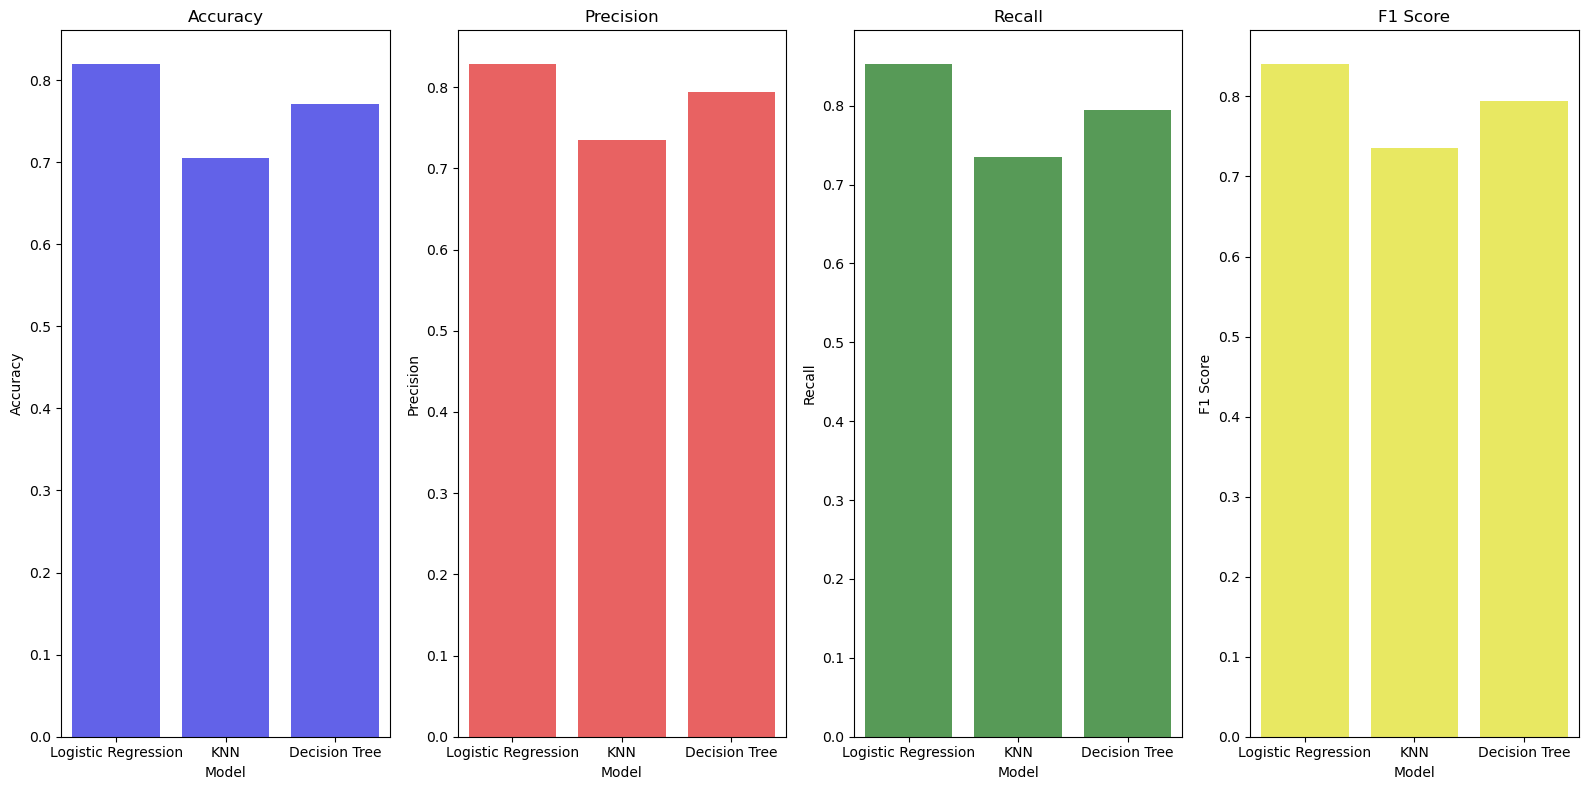

In [51]:
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 4, 1)  # Histogram to show the distribution of the numerical features, 1 row, 4 columns
sns.barplot(x=clean_model_scores_df['Model'], y=clean_model_scores_df['Accuracy'], color='blue', alpha=0.7)
plt.title(f'Accuracy') 


plt.subplot(1, 4, 2)  
sns.barplot(x=clean_model_scores_df['Model'], y=clean_model_scores_df['Precision'], color='red', alpha=0.7)
plt.title(f'Precision') 
    
plt.subplot(1, 4, 3)  
sns.barplot(x=clean_model_scores_df['Model'], y=clean_model_scores_df['Recall'], color='green', alpha=0.7)
plt.title(f'Recall') 

plt.subplot(1, 4, 4)  
sns.barplot(x=clean_model_scores_df['Model'], y=clean_model_scores_df['F1 Score'], color='yellow', alpha=0.7)
plt.title(f'F1 Score') 


plt.tight_layout()
plt.show()

In [52]:
# Add a new column to differentiate clean and unclean models
clean_model_scores_df['Data Type'] = 'Clean'
model_scores_df['Data Type'] = 'Default'

# Combine both datasets
combined_model_scores_df = pd.concat([clean_model_scores_df, model_scores_df])

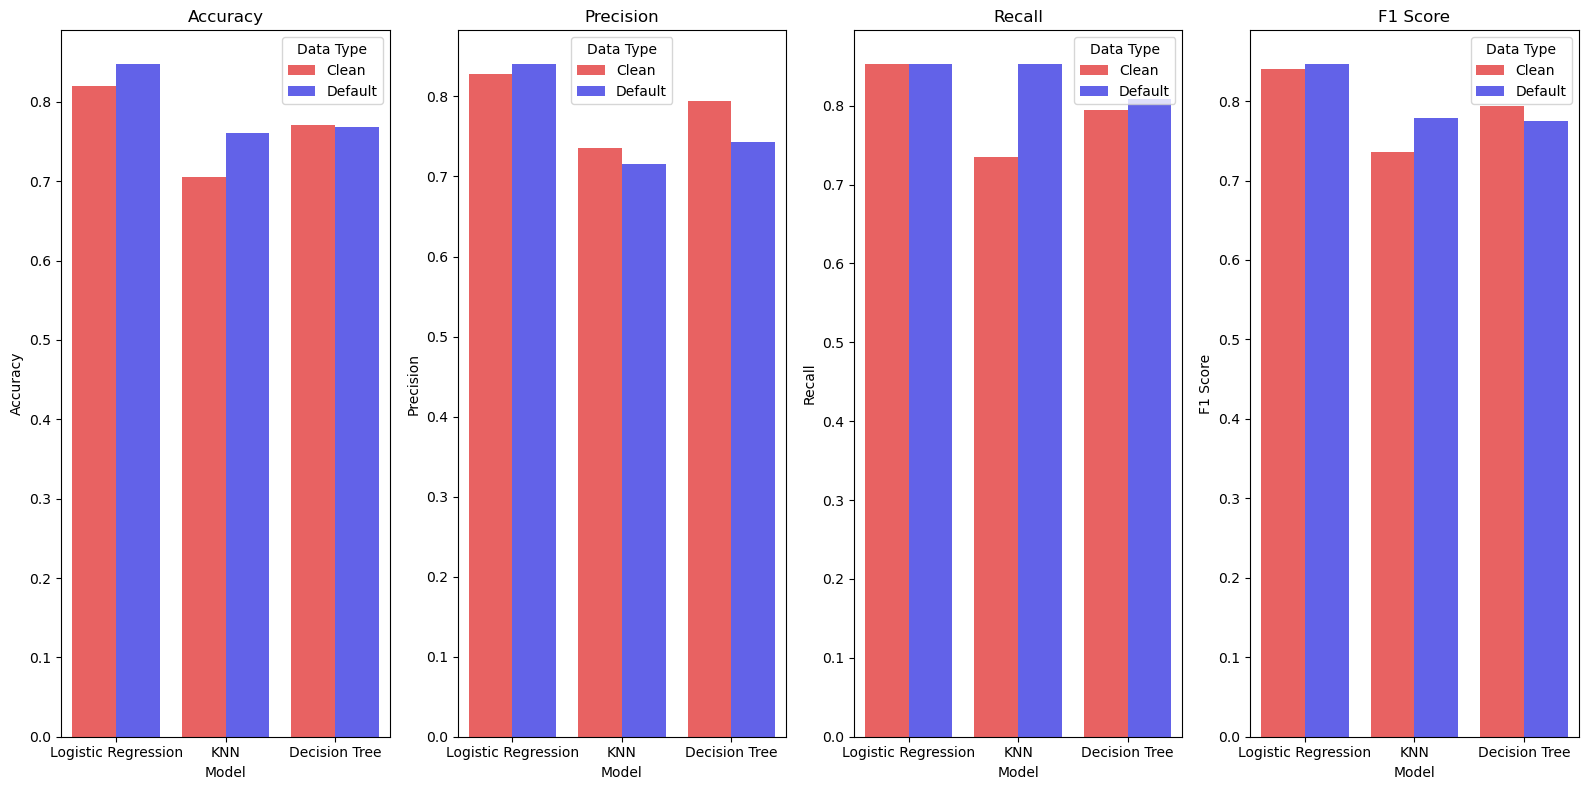

In [53]:
plt.figure(figsize=(16, 8))  

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Loop through each metric to create subplots
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i)  # Arrange subplots in a single row (1 row, 4 columns)
    sns.barplot(x='Model', y=metric, hue='Data Type', data=combined_model_scores_df, palette=['red', 'blue'], alpha=0.7)
    plt.title(metric)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

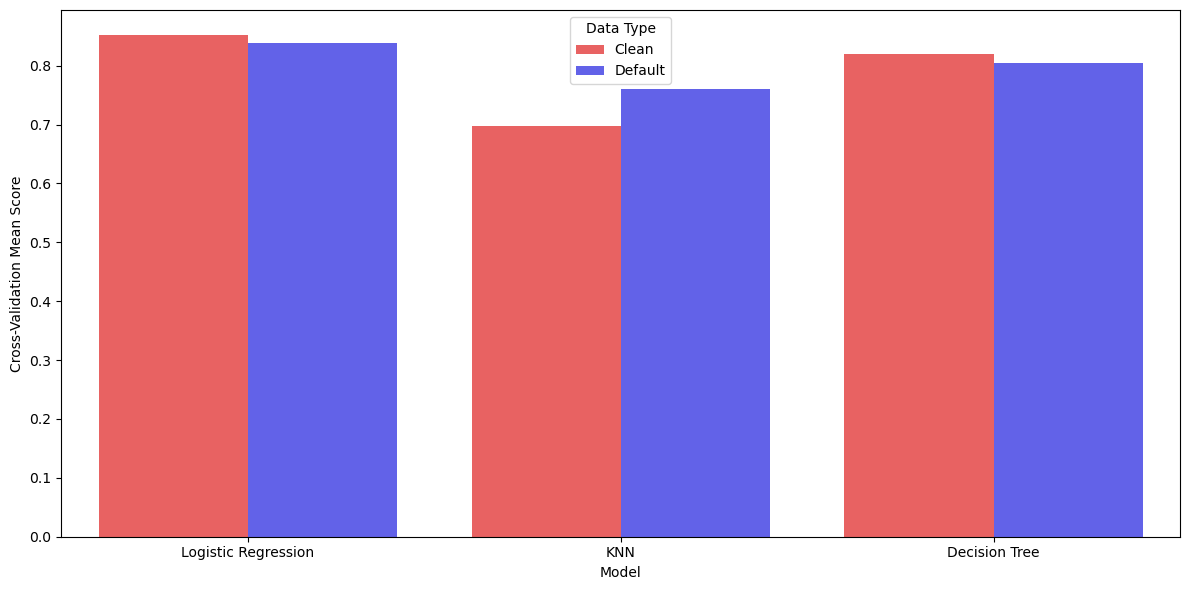

In [54]:
# Comparing the cross-validation scores between the Raw (Default) and Cleaned data.


plt.figure(figsize=(12, 6)) 
sns.barplot(x='Model', y='Cross-Validation Mean Score', hue='Data Type', data=combined_model_scores_df, palette=['red', 'blue'], alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
# Hyperparameter Tuning the KNN Model. 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10]
}

knn_grid_search = GridSearchCV(clean_knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Parameters:", knn_grid_search.best_params_)
print("Best Cross-Validation Score:", knn_grid_search.best_score_)

# Evaluate best model on test data
best_knn = knn_grid_search.best_estimator_
knn_y_pred_tuned = best_knn.predict(X_test_scaled)

clean_knn_accuracy_tuned = accuracy_score(y_test, knn_y_pred_tuned)
clean_knn_precision_tuned = precision_score(y_test, knn_y_pred_tuned)
clean_knn_recall_tuned = recall_score(y_test, knn_y_pred_tuned)
clean_knn_f1_tuned = f1_score(y_test, knn_y_pred_tuned)

print(f'Tuned Model Accuracy: {clean_knn_accuracy_tuned}')
print(f'Tuned Model Precision: {clean_knn_precision_tuned}')
print(f'Tuned Model Recall: {clean_knn_recall_tuned}')
print(f'Tuned Model F1 Score: {clean_knn_f1_tuned}')

Best Parameters: {'n_neighbors': 1}
Best Cross-Validation Score: 0.8270408163265307
Tuned Model Accuracy: 0.7868852459016393
Tuned Model Precision: 0.7560975609756098
Tuned Model Recall: 0.9117647058823529
Tuned Model F1 Score: 0.8266666666666667


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [56]:
# Hyperparameter Tuning the Logistic Regression Model.
param_grid = {
    'C': [0.5, 1, 2, 3, 5, 7, 10],
}

# Initialize GridSearchCV
lr_grid_search = GridSearchCV(clean_lr_model, param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Cross-Validation Score:", lr_grid_search.best_score_)

# Evaluate best model on test data
best_lr = lr_grid_search.best_estimator_
lr_y_pred_tuned = best_lr.predict(X_test_scaled)

clean_lr_accuracy_tuned = accuracy_score(y_test, lr_y_pred_tuned)
clean_lr_precision_tuned = precision_score(y_test, lr_y_pred_tuned)
clean_lr_recall_tuned = recall_score(y_test, lr_y_pred_tuned)
clean_lr_f1_tuned = f1_score(y_test, lr_y_pred_tuned)

print(f'Tuned Model Accuracy: {clean_lr_accuracy_tuned}')
print(f'Tuned Model Precision: {clean_lr_precision_tuned}')
print(f'Tuned Model Recall: {clean_lr_recall_tuned}')
print(f'Tuned Model F1 Score: {clean_lr_f1_tuned}')

Best Parameters: {'C': 0.5}
Best Cross-Validation Score: 0.8600340136054422
Tuned Model Accuracy: 0.819672131147541
Tuned Model Precision: 0.8285714285714286
Tuned Model Recall: 0.8529411764705882
Tuned Model F1 Score: 0.8405797101449275


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [57]:
# Hyperparameter Tuning the Decision Tree Model
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples required per leaf node
}

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(clean_tree_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Parameters:", dt_grid_search.best_params_)
print("Best Cross-Validation Score:", dt_grid_search.best_score_)

# Evaluate best model on test data
best_dt = dt_grid_search.best_estimator_
dt_y_pred_tuned = best_dt.predict(X_test_scaled)

clean_dt_accuracy_tuned = accuracy_score(y_test, dt_y_pred_tuned)
clean_dt_precision_tuned = precision_score(y_test, dt_y_pred_tuned)
clean_dt_recall_tuned = recall_score(y_test, dt_y_pred_tuned)
clean_dt_f1_tuned = f1_score(y_test, dt_y_pred_tuned)

print(f'Tuned Model Accuracy: {clean_dt_accuracy_tuned}')
print(f'Tuned Model Precision: {clean_dt_precision_tuned}')
print(f'Tuned Model Recall: {clean_dt_recall_tuned}')
print(f'Tuned Model F1 Score: {clean_dt_f1_tuned}')

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8517006802721088
Tuned Model Accuracy: 0.8032786885245902
Tuned Model Precision: 0.7894736842105263
Tuned Model Recall: 0.8823529411764706
Tuned Model F1 Score: 0.8333333333333334


In [58]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']

accuracy = [clean_lr_accuracy_tuned, clean_knn_accuracy_tuned, clean_dt_accuracy_tuned]
precision = [clean_lr_precision_tuned, clean_knn_precision_tuned, clean_dt_precision_tuned]
recall = [clean_lr_recall_tuned, clean_knn_recall_tuned, clean_dt_recall_tuned]
F1_Score = [clean_lr_f1_tuned, clean_knn_f1_tuned, clean_dt_f1_tuned]
cross_val_scores = [lr_grid_search.best_score_, knn_grid_search.best_score_, dt_grid_search.best_score_]

# Create DataFrame with the cleaned and tuned model scores.
clean_tuned_model_scores_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score' : F1_Score,
    'Cross-Validation Mean Score': cross_val_scores
})

clean_tuned_model_scores_df

,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score
0,Logistic Regression,0.819672,0.828571,0.852941,0.840580,0.860034
1,KNN,0.786885,0.756098,0.911765,0.826667,0.827041
2,Decision Tree,0.803279,0.789474,0.882353,0.833333,0.851701


In [59]:
# Create DataFrame with the cleaned and default model scores, both un-tuned and tuned.
model_scores_df['Data Type'] = 'Default'
tuned_model_scores_df['Data Type'] = 'Default Tuned'
clean_model_scores_df['Data Type'] = 'Cleaned'
clean_tuned_model_scores_df['Data Type'] = 'Cleaned Tuned'



# Concatenate the model scores DataFrames
full_combined_model_scores_df = pd.concat([model_scores_df, tuned_model_scores_df, clean_model_scores_df, clean_tuned_model_scores_df])

# Reset index to remove any existing index and drop it
full_combined_model_scores_df = full_combined_model_scores_df.reset_index(drop=True)

# Sort by 'Model' column
full_combined_model_scores_df = full_combined_model_scores_df.sort_values(by='Model', ignore_index=True)

# Display the result
full_combined_model_scores_df


,Model,Accuracy,Precision,Recall,F1 Score,Cross-Validation Mean Score,Data Type
0,Decision Tree,0.768116,0.743243,0.808824,0.774648,0.804348,Default
1,Decision Tree,0.811594,0.762500,0.897059,0.824324,0.840606,Default Tuned
2,Decision Tree,0.770492,0.794118,0.794118,0.794118,0.819235,Cleaned
3,Decision Tree,0.803279,0.789474,0.882353,0.833333,0.851701,Cleaned Tuned
4,KNN,0.760870,0.716049,0.852941,0.778523,0.760870,Default
5,KNN,0.826087,0.782051,0.897059,0.835616,0.851450,Default Tuned
6,KNN,0.704918,0.735294,0.735294,0.735294,0.697596,Cleaned
7,KNN,0.786885,0.756098,0.911765,0.826667,0.827041,Cleaned Tuned
8,Logistic Regression,0.847826,0.840580,0.852941,0.846715,0.839130,Default
9,Logistic Regression,0.840580,0.838235,0.838235,0.838235,0.865962,Default Tuned


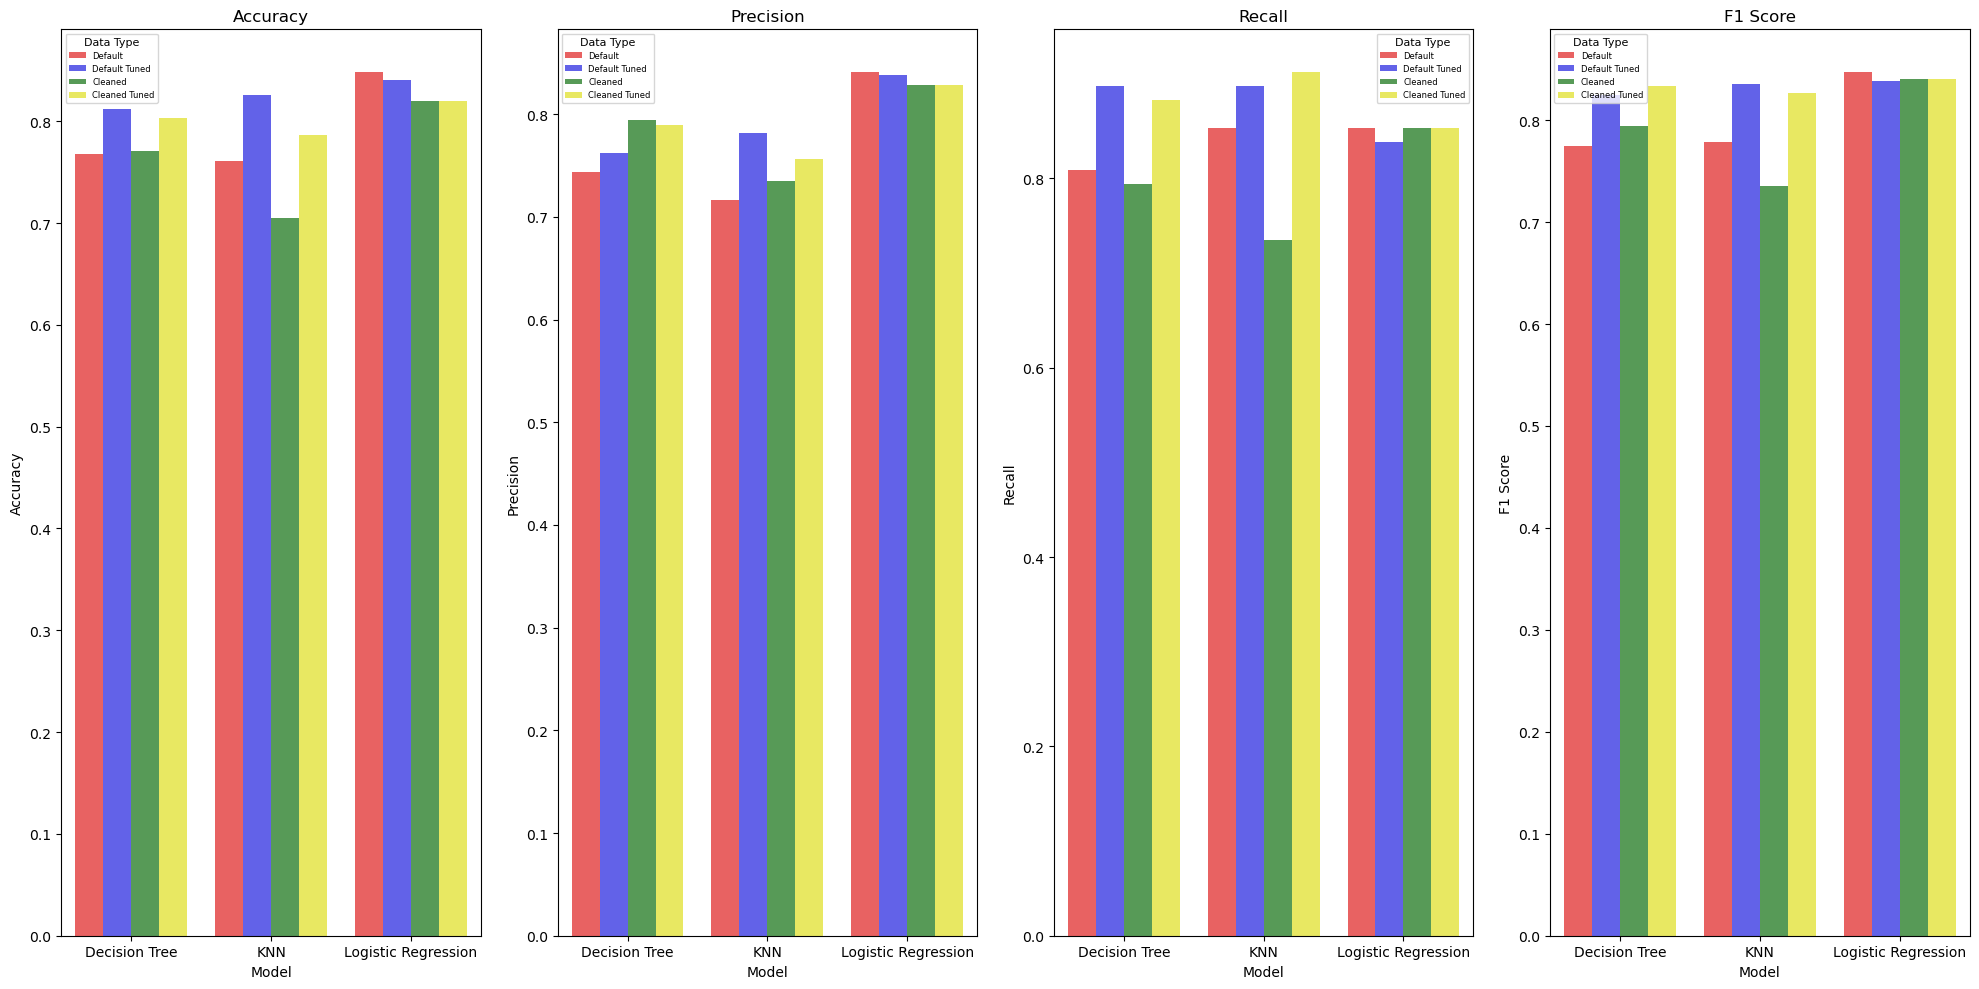

In [60]:
plt.figure(figsize=(20, 10)) # Comparing all the models and data types with each other.

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i)  
    sns.barplot(x='Model', y=metric, hue='Data Type', data=full_combined_model_scores_df, palette=['red', 'blue', 'green', 'yellow'], alpha=0.7)
    plt.legend(title='Data Type', fontsize='6', title_fontsize='8')
    plt.title(metric)

plt.tight_layout()
plt.show()

This chart shows the dataset of the crossvalidation scores of all models, in both its cleaned, raw, and tuned states. In most results, the default Logistic Regression is still the most accurate, and precise, losing some points to the KNN Model with regards to recall. The Logistic Regression in its the default dataset is therefore, we have found, the best model to use for this overall  project as it's already optimized. 

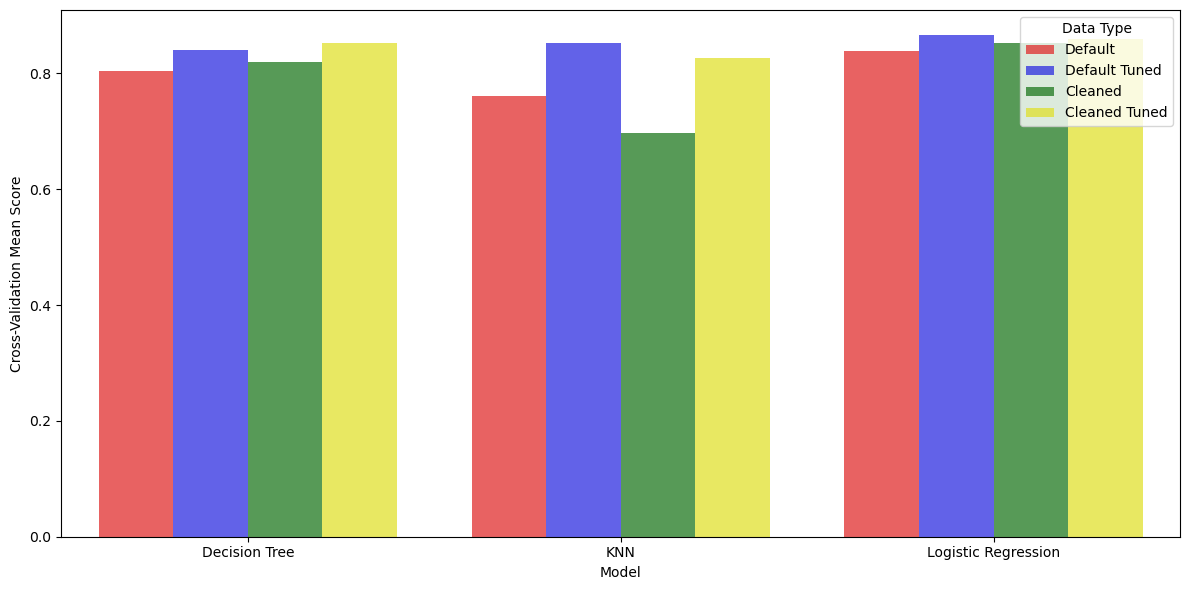

In [61]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Model', y='Cross-Validation Mean Score', hue='Data Type', data=full_combined_model_scores_df, palette=['red', 'blue', 'green', 'yellow'], alpha=0.7)
plt.tight_layout()
plt.show()

#### 6.4 - Model Selection
Based on the evaluation results, with both raw, HyperParameter optimized data and clean data, the best model to use for this dataset is Logistic Regression.
This model has the highest accuracy, precision, recall and F1 score, indicating its ability to correctly predict the target variable, and is not over-fitting the data. The hyperparameter for this model is the C value, which controls the regularization strength of the model, and is performing well.

This shows the comparison between the cross-validation performance (all of the scores of each combined in different folds or sets) of the default and default tuned models, the cleaned and cleaned tuned models.
The tuned models are generally better than the default models in the cross-validation scores (and have less overfitting). 
However, once split into the different scores (with no folds), the default logistic regression model comes out as the best model.

### 7 - Interpretation and Conclusion

##### Key Insights about the Datasets

- We are unsure of what the columns represent other than A1 and A2 (which represent gender and age) and the target feature A16 (which represents credit approval or denial).
- The dataset has slightly more denials of credit requests than approvals, which skews the data towards the negative a bit.
- This set also seems to over fit the models heavily if no hyper parameter tuning is used. This could indicate that the dataset might have inherent issues, which could just be a lack of size.
- Columns that affect the target feature of credit decision (A16) positively are A4 and A5, with A9 negatively impacting the target feature. 
- True and false (Yes/No) values have a correlate the strongest on whether a participant gets a credit approval or not, as seen with A9, A10, and A12.   
- There are a lot of outliers in the columns, which cleaning up (by user interquartile ranges) did not help.
- The distribution of the age vs credit approval decision makes sense as there are more young people applying for credit than older people, and therefore they are more likely to get approved. That shows its a weak correlation between age and credit approval decision.
- The other feature that might be interesting is between A3 and A16, showing that between 0-5 range is a more likely decision to get approved. However there are a lot of outliers, which might be affecting the data. 


##### Key Insights about the Machine Learning Model analysis

- We used three machine learning models to find the optimal way to understand the data: K-Nearest Neighbor, Logistical Regression, and Decision Tree.
- We used StandardScaler instead of MinMaxing as this was assumed to be better for the models we were using (it being more of a general tool).
- The models have their performance variate between four different types: Default (the regular dataset), Default_Cleaned (through outlier-removal), Tuned (through hyper-parameter tuning), and Tuned_Cleaned (removing the outliers and using the tuned models).
- Overall on this dataset, the mean scores suggest that the tuned models score significantly higher than the non-tuned models. It also helps with the over-fitting problems that this dataset naturally has.
- The best out of all the models being: Logistical Regression, with the default dataset and tuned with hyper-parameters. 


##### Discuss decision-making and conclusion

- Making true and false questions weigh heavily against the participants, impacting their possibility of getting a credit approval should be looked at further, as this could possibly be correlating too much. 
- Based on the model analysis, the data is not very suited for the models, and when crossvalidating, the data seems to overfit at times. The difference between the folds (when using cross-validation) was too large at times, making the divide between the mean scores large.
- With unanonimized data, there could be a more focused analysis done on specific features. In general also, the data would be more understood, which could lead to new avenuas of research such as a to look at the demographics/economics, and find patterns within age/gender/career/education/etc. more easily. We could also find biases within gender for example, which could be investigated further.
- Hyperparameter was key to increasing the performance of the models in this dataset, which suggests the optimization could be necessary to include in the future.
- The overfitting issues may mean that the model performs well in training, but could perform badly in real world applications. On that note, the size of the dataset needs to be increased for any valuable insights to be gained from it.   
